In [5]:
from commonfunctions import *
import numpy as np
import cv2
import math
import timeit
%matplotlib inline
%load_ext autoreload
%autoreload 2

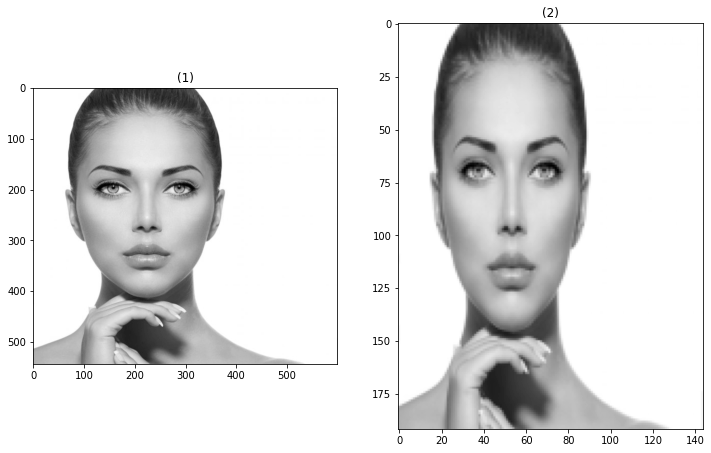

In [6]:
img = rgb2gray(io.imread('test_images\woman.jpg'))

resized = cv2.resize(img, (144,192), interpolation = cv2.INTER_AREA)
show_images([img,resized])

In [7]:
def HOG_descriptor(img):
    resized = cv2.resize(img, (48,64), interpolation = cv2.INTER_AREA)
    mag,angle=gradient(resized)
#     print(resized.shape)
    
    #loop on mag and angle to get 16*16 cell
    windowsize_r =8
    windowsize_c =8
    bin_size=20
    mag_cells=[]
    ang_cells=[]

    
    #check code image on what`s app for efficient split
    
    #TODO make 2d
    
#     for r in range(0,mag.shape[0] - windowsize_r, windowsize_r):
#         temp_mag=[]
#         temp_angle=[]
#         for c in range(0,mag.shape[1] - windowsize_c, windowsize_c):  
            
#             temp_mag.append(mag[r:r+windowsize_r,c:c+windowsize_c])
#             temp_angle.append(angle[r:r+windowsize_r,c:c+windowsize_c])
        
#         mag_cells.append(temp_mag)
#         ang_cells.append(temp_angle)  

    #get 16*16 cells
    mag=cut_image(mag,windowsize_r,windowsize_c)
    print(mag.shape)
    angle=cut_image(angle,windowsize_r,windowsize_c)
    print(angle.shape)
    
#     print(mag_cells.shape)
#     show_images([mag_cells[1][0],mag_cells[1][1],mag_cells[1][2],mag_cells[1][3]])
    
    #histogram of each cell
    hist=np.zeros((mag.shape[0], mag.shape[1],180//bin_size))
    start = timeit.default_timer()
    #print("vectorized",vectorized_hog(mag_cells,ang_cells,bin_size))
    low_bins=20*(angle//20)
    
    high_bins=20+low_bins
    
    ## weights
    weight_low_bin=(abs(high_bins-angle)/20)*mag
    weight_high_bin=(abs(angle-low_bins)/20)*mag
    low_bins=low_bins//20
    
    high_bins=high_bins//20
    
    high_bins=high_bins%180
    print("heeeh",high_bins.shape)
    start = timeit.default_timer()
    #for r in range(mag.shape[0]):
    #    for  c in range(mag.shape[1]):
    #        hist[r][c]=np.histogram(low_bins[r][c], bins=range(10), weights=weight_low_bin[r][c])[0]+np.histogram(high_bins[r][c], bins=range(10), weights=weight_high_bin[r][c])[0]
    hist=[[np.histogram(low_bins[r][c], bins=range(10), weights=weight_low_bin[r][c])[0]+np.histogram(high_bins[r][c], bins=range(10), weights=weight_high_bin[r][c])[0] for c in range(mag.shape[1])]for r in range(mag.shape[0])]
    stop = timeit.default_timer()
    print("timewewwww",stop-start)
    hist=np.array(hist)
    norm_hist=[]
    start = timeit.default_timer()
    for r in range(hist.shape[0]-1):
        for  c in range(hist.shape[1]-1):
            temp=hist[r:r+2, c:c+2].reshape(-1)
            temp/=np.linalg.norm(temp)
            norm_hist+=list(temp)
    norm_hist=np.asarray(norm_hist)
    stop = timeit.default_timer()
    print("timewewwww",stop-start)
#     print('size of hist',hist.shape)
#     print('size of norm_hist',norm_hist.shape)
#     print(hist)
    return norm_hist
   
    
 
    

In [8]:
def cut_image(img,windowsize_r,windowsize_c):
    tiles=[]
    img_r=img.shape[0]
    img_c=img.shape[1]
    tiles=img.reshape(img_r//windowsize_r,
                      windowsize_r,
                     img_c//windowsize_c,
                     windowsize_c)
    tiles=tiles.swapaxes(1,2)
    return tiles

In [9]:
# def HOG_histogram(mag,angle,bin_size=20):
#     hist=np.zeros(int(180/bin_size))
#     low_bins=(angle//20)
    
#     high_bins=(20+low_bins)//20
    
#     ## weights
#     weight_low_bin=(abs(high_bins-angle)/20)*mag
#     weight_high_bin=(abs(angle-low_bins)/20)*mag
    
    
#     high_bins=high_bins%180
#     #print("leeejjjejr",np.reshape(np.array(range(hist.shape[0])),(1,1,3)))
#     print(low_bins)
#     print("dodo",np.array(range(hist.shape[0])).shape)
#     print("zeze",np.tile(np.array(range(hist.shape[0])).reshape(9,1),(1,1,16*16)).reshape(9,16,16))
#     zeze=np.tile(np.array(range(hist.shape[0])).reshape(9,1),(1,1,16*16)).reshape(9,16,16)
#     print("modo",np.tile(low_bins, (9,1,1))==np.array(range(hist.shape[0])))
#     meme=np.tile(low_bins, (9,1,1))
#     print("nono",(zeze==meme).shape)
#     print("nono",np.tile(weight_low_bin, (9,1,1))[zeze==meme].shape)
#     print("lolo",(np.histogram(low_bins, bins=range(hist.shape[0]+1), weights=weight_low_bin)[0].sum(),weight_low_bin.sum()))
#     print(weight_low_bin.sum()+weight_high_bin.sum(),mag.sum())
def HOG_histogram(mag,angle,bin_size=20):
    
    #print("lolo",(np.histogram(low_bins, bins=range(hist.shape[0]+1), weights=weight_low_bin)[0].sum(),weight_low_bin.sum()))    
    #print(weight_low_bin.sum()+weight_high_bin.sum(),mag.sum())
    pass

    
#     for i in range(hist.shape[0]):
        
#         votes_low=np.sum(weight_low_bin[(low_bins//20)==i])
#         votes_high=np.sum(weight_high_bin[(high_bins//20)==i])
#         hist[i]=votes_low+votes_high
#         hist=[np.sum(weight_low_bin[low_bins==i])]+[]
    #print("mag",np.sum(mag))
    #print("hist",np.sum(hist))
    return hist


    
    
    

In [10]:
#cell is a matrix 8x8
def gradient(img):
    img=np.float32(img) / 255.0
    gx = cv2.Sobel(img, cv2.CV_32F, 1, 0, ksize=1)
    gy = cv2.Sobel(img, cv2.CV_32F, 0, 1, ksize=1)
    mag, angle = cv2.cartToPolar(gx, gy, angleInDegrees=True)

#     show_images([gx,gy,mag,angle],["gx","gy","mag","angle"])
#     print("mag",np.sum(mag))
    return mag,angle%180

    
    

In [155]:

vectorized_hog=np.vectorize(HOG_histogram)

In [17]:
from skimage import data, color, feature,transform
start = timeit.default_timer()
print(HOG_descriptor(img))
end = timeit.default_timer()
print(end-start)
start = timeit.default_timer()
print(feature.hog(cv2.resize(img, (48,64), interpolation = cv2.INTER_AREA),cells_per_block=(2,2),pixels_per_cell=(16, 16)).shape)
end = timeit.default_timer()
print(end-start)

(8, 6, 8, 8)
(8, 6, 8, 8)
heeeh (8, 6, 8, 8)
timewewwww 0.013135199999851466
timewewwww 0.0017531999997117964
[0.14830478 0.32670775 0.10490367 ... 0.0025823  0.         0.00502417]
0.020413200000348297
(216,)
0.0021001000000069325


In [125]:
start1 = timeit.default_timer()
HOG_descriptor(img)
stop1 = timeit.default_timer()
start2 = timeit.default_timer()
feature.hog(cv2.resize(img, (48,64), interpolation = cv2.INTER_AREA),cells_per_block=(2,2))
stop2 = timeit.default_timer()
print (stop1-start1, -start2+stop2)


(8, 6, 8, 8)
(8, 6, 8, 8)
heeeh (8, 6, 8, 8)
0.00905120000061288 0.0017425999994884478


In [72]:
from sklearn.datasets import fetch_lfw_people
from skimage import data, color, feature,transform
from  sklearn.feature_extraction.image import PatchExtractor

faces = fetch_lfw_people()

In [52]:
# SVM

#positive data
positive_patches = faces.images
print(positive_patches.shape)


imgs_to_use = ['camera', 'text', 'coins', 'moon',
               'page', 'clock', 'immunohistochemistry',
               'chelsea', 'coffee', 'hubble_deep_field']
images = [color.rgb2gray(getattr(data, name)())
          for name in imgs_to_use]


(13233, 62, 47)


<ipython-input-52-00e0f3567f46>:11: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  images = [color.rgb2gray(getattr(data, name)())


In [363]:
print(positive_patches.shape)

(13233, 62, 47)


In [364]:
def extract_patches(img, N, scale=1.0, patch_size=positive_patches[0].shape):
    extracted_patch_size = tuple((scale * np.array(patch_size)).astype(int))
    extractor = PatchExtractor(patch_size=extracted_patch_size,
                               max_patches=N, random_state=0)
    patches = extractor.transform(img[np.newaxis])
    if scale != 1:
        patches = np.array([transform.resize(patch, patch_size)
                            for patch in patches])
    return patches

negative_patches = np.vstack([extract_patches(im, 1000, scale)
                              for im in images for scale in [0.5, 1.0, 2.0]])
negative_patches.shape

(30000, 62, 47)

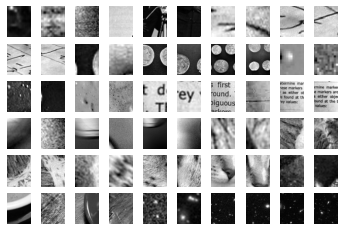

In [365]:
fig, ax = plt.subplots(6, 10)
for i, axi in enumerate(ax.flat):
    axi.imshow(negative_patches[500 * i], cmap='gray')
    axi.axis('off')

In [366]:
from itertools import chain
X_train = np.array([HOG_descriptor(im)
                    for im in chain(positive_patches, negative_patches)])

# add labels
y_train = np.zeros(X_train.shape[0])
y_train[:positive_patches.shape[0]] = 1

time 0.002367400000366615
time 0.0023510999999416526
time 0.0026835000007849885
time 0.002391199999692617
time 0.0024162000008800533
time 0.0023118000008253148
time 0.0024520000006305054
time 0.0023550999994768063
time 0.0023987999993551057
time 0.0023864000013418263
time 0.004116199999771197
time 0.0024341999996977393
time 0.0024080999992293073
time 0.0038342999996530125
time 0.0023426999996445375
time 0.0024259000001620734
time 0.0024200000007112976
time 0.0024224999997386476
time 0.0024223000000347383
time 0.002473399999871617
time 0.002421499999400112
time 0.002362000001085107
time 0.0024154000002454268
time 0.002416399998764973
time 0.0024659999999130378
time 0.002432399998724577
time 0.0022514000011142343
time 0.0024336999995284714
time 0.0023003999995125923
time 0.002413700000033714
time 0.002397299998847302
time 0.002436900000247988
time 0.0024878000003809575
time 0.0022539999990840442
time 0.0024117000011756318
time 0.002522000000681146
time 0.0023897000010038028
time 0.002558

time 0.0023407999997289153
time 0.0024033999998209765
time 0.0025822000006883172
time 0.0026318999989598524
time 0.002602399999886984
time 0.00247039999885601
time 0.0024236999997810926
time 0.002742100001341896
time 0.0024183000004995847
time 0.0023872999990999233
time 0.0024033000008785166
time 0.002524200001062127
time 0.0025004999988595955
time 0.002388899998550187
time 0.002518499999496271
time 0.0024009000007936265
time 0.0023746999995637452
time 0.002574599999206839
time 0.0022017000010237098
time 0.0025740999990375713
time 0.002444299998387578
time 0.00239779999901657
time 0.002519899999242625
time 0.00233470000057423
time 0.0023920000003272435
time 0.0023106999997253297
time 0.002339900000151829
time 0.0026373000000603497
time 0.0033439000017096987
time 0.0024747000006755115
time 0.0025149000011879252
time 0.002398499998889747
time 0.00228160000006028
time 0.0022473000008176314
time 0.0024198000010073883
time 0.00238809999973455
time 0.0023796999994374346
time 0.00237459999880

time 0.0025777999999263557
time 0.002450699999826611
time 0.0023901000004116213
time 0.0024354000015591737
time 0.002664000001459499
time 0.00250170000072103
time 0.002668900000571739
time 0.0023628999988432042
time 0.0025354999997944105
time 0.002494099999239552
time 0.002523000001019682
time 0.0026293999999325024
time 0.0023373999993054895
time 0.002602499998829444
time 0.0025353000000905013
time 0.0024207999995269347
time 0.002403599999524886
time 0.0024057999999058666
time 0.002618599999550497
time 0.0024145000006683404
time 0.0024433999988104915
time 0.002518900000723079
time 0.002713199999561766
time 0.002495900000212714
time 0.0025055000005522743
time 0.002499099999113241
time 0.0024950999995780876
time 0.0026104000007762806
time 0.002413100000921986
time 0.0021904999994148966
time 0.0024235999990196433
time 0.0025103000007220544
time 0.0024300000004586764
time 0.0023877000003267312
time 0.002379100000325707
time 0.0023992000005819136
time 0.002436999999190448
time 0.00251059999

time 0.0026515999998082407
time 0.002341299999898183
time 0.0024474999991070945
time 0.0024075999990600394
time 0.0023801000006642425
time 0.00239049999981944
time 0.002378600000156439
time 0.0024769000010564923
time 0.002184599999964121
time 0.002461399999447167
time 0.002401800000370713
time 0.002447899998514913
time 0.002399499999228283
time 0.00232020000112243
time 0.00261060000048019
time 0.002394799999819952
time 0.0027090000003227033
time 0.0023966999997355742
time 0.0023261000005732058
time 0.0024063000000751344
time 0.002450699999826611
time 0.0023901999993540812
time 0.0024790999996184837
time 0.0023070000006555347
time 0.0023832000006223097
time 0.0023909999999887077
time 0.002284700000018347
time 0.002456000000165659
time 0.0023901999993540812
time 0.0023723000012978446
time 0.0023593000005348586
time 0.0024009999997360865
time 0.0024015999988478143
time 0.0023931000014272286
time 0.002394799999819952
time 0.002398299999185838
time 0.0022838000004412606
time 0.0023966999997

time 0.002918100000897539
time 0.0024229000009654555
time 0.0026847999997698935
time 0.002419799999188399
time 0.0024406000011367723
time 0.0025182999997923616
time 0.0024300000004586764
time 0.002294399999300367
time 0.002505899999960093
time 0.002400899998974637
time 0.00239520000104676
time 0.0023057999987941002
time 0.0024830999991536373
time 0.002387000000453554
time 0.0024993999995786
time 0.002413199999864446
time 0.0024109000005410053
time 0.0025151999998342944
time 0.002596599999378668
time 0.0023934000000735978
time 0.0023327999988396186
time 0.0026085999998031184
time 0.002388100001553539
time 0.003021299999090843
time 0.002383400000326219
time 0.0024051999989751494
time 0.002383300001383759
time 0.0024056000002019573
time 0.0023105000000214204
time 0.0024023999994824408
time 0.0026242000003549038
time 0.0023999000004550908
time 0.002391199999692617
time 0.0024537999997846782
time 0.0026063000004796777
time 0.002389299999776995
time 0.002408300000752206
time 0.00266640000154

time 0.0024515999994036974
time 0.0028615999999601627
time 0.002348899999560672
time 0.0022812000006524613
time 0.00224770000022545
time 0.0022528999998030486
time 0.002379200001087156
time 0.0023670999999012565
time 0.0023903999990579905
time 0.0027097000001958804
time 0.0024092000003292924
time 0.0023627999999007443
time 0.002433499999824562
time 0.0026438999993843026
time 0.0025365000001329463
time 0.0024217999998654705
time 0.002639300000737421
time 0.0024278000000776956
time 0.0026520999999775086
time 0.0023970999991433928
time 0.002658700001120451
time 0.0026930000003630994
time 0.002529299999878276
time 0.002277900000990485
time 0.0023811999999452382
time 0.0022992000012891367
time 0.0024135000003298046
time 0.002630800001497846
time 0.0022993999991740566
time 0.002318099999683909
time 0.002384100000199396
time 0.0023326000009546988
time 0.002552300000388641
time 0.0023779999992257217
time 0.002417800000330317
time 0.002298900000823778
time 0.0022931000003154622
time 0.002432600

time 0.002862400000594789
time 0.002488899999661953
time 0.002416000001176144
time 0.0023901000004116213
time 0.002394000001004315
time 0.002348800000618212
time 0.002425000000584987
time 0.0023861000008764677
time 0.002524599998650956
time 0.0023651999999856343
time 0.002385199999480392
time 0.00235419999989972
time 0.002349500000491389
time 0.0023559000001114327
time 0.0024064999997790437
time 0.002264300001115771
time 0.002398100001300918
time 0.002389299999776995
time 0.0023110999991331482
time 0.0024570000005041948
time 0.0024121000005834503
time 0.0023955000015121186
time 0.0022630000003118766
time 0.0023958999991009478
time 0.002366999999139807
time 0.0024081000010482967
time 0.002386500000284286
time 0.0024098000012600096
time 0.002261900001030881
time 0.0025050999993254663
time 0.002264400000058231
time 0.0023677999997744337
time 0.0026098999987880234
time 0.0023942000007082243
time 0.002250500001537148
time 0.002397000000200933
time 0.002255400000649388
time 0.002414100001260

time 0.002383900000495487
time 0.002270999999382184
time 0.002711700000872952
time 0.003071399998589186
time 0.0024979999998322455
time 0.0024033999998209765
time 0.0023991999987629242
time 0.0023342999993474223
time 0.004157399998803157
time 0.0024994000013975892
time 0.0023999000004550908
time 0.0024412000002485
time 0.0023999999993975507
time 0.0034611999999469845
time 0.002524200001062127
time 0.002409199998510303
time 0.002545800000007148
time 0.0024590000011812663
time 0.0025020000011863885
time 0.0025996999993367353
time 0.00236149999909685
time 0.002549300001192023
time 0.002362699999139295
time 0.0025330000007670606
time 0.0023919000013847835
time 0.002492900001016096
time 0.002244700001028832
time 0.0025296999992860947
time 0.0033025999982783105
time 0.002412499999991269
time 0.0023503000011260156
time 0.002419799999188399
time 0.0025388000012753764
time 0.002399599999989732
time 0.0025948999991669552
time 0.002425099999527447
time 0.0025134000006801216
time 0.002348800000618

time 0.003129500000795815
time 0.002568300000348245
time 0.0025332999994134298
time 0.0023847000011301134
time 0.002432100000078208
time 0.0022950999991735443
time 0.002498899999409332
time 0.0024051000000326894
time 0.0025141000005532987
time 0.0024788999999145744
time 0.0023504000000684755
time 0.0024028999996517086
time 0.002322000000276603
time 0.0025079000006371643
time 0.002468699998644297
time 0.0024811000002955552
time 0.0023194999994302634
time 0.0022296999995887745
time 0.0024004000006243587
time 0.002567300000009709
time 0.0023896999991848134
time 0.002331600000616163
time 0.0024825000000419095
time 0.002392399999735062
time 0.0025915999995049788
time 0.0024972000010166084
time 0.0024045999998634215
time 0.002407899999525398
time 0.00237100000049395
time 0.0024198999999498483
time 0.0024999999986903276
time 0.0022886999995535007
time 0.00243390000105137
time 0.002536899999540765
time 0.0024266000000352506
time 0.002596599999378668
time 0.002379100000325707
time 0.00245830000

time 0.0029061000004730886
time 0.0024331999993592035
time 0.002425099999527447
time 0.0026303999984520487
time 0.00244360000033339
time 0.0025913000008586096
time 0.00240259999918635
time 0.002405499999440508
time 0.002514800000426476
time 0.002687599999262602
time 0.0024009999997360865
time 0.0025727000011102064
time 0.002445800000714371
time 0.002411299999948824
time 0.002398200000243378
time 0.00240739999935613
time 0.0023504000000684755
time 0.002485200000592158
time 0.0027473999998619547
time 0.0023963000003277557
time 0.0024454000013065524
time 0.0023937999994814163
time 0.0023428999993484467
time 0.0025067000005947193
time 0.0023610000007465715
time 0.002377400000113994
time 0.00236860000040906
time 0.0023669000001973473
time 0.002378699999098899
time 0.0023808999994798796
time 0.0024147999993147096
time 0.0023956999993970385
time 0.0024824000010994496
time 0.0022830000016256236
time 0.0026114000011148164
time 0.0023146999992604833
time 0.002348399999391404
time 0.0023357999998

time 0.003063400001337868
time 0.002520899999581161
time 0.0024859999994077953
time 0.002453099999911501
time 0.0025051000011444557
time 0.002416700001049321
time 0.0025498999984847615
time 0.0023779000002832618
time 0.0024593999987700954
time 0.0024573999999120133
time 0.0023801999996067025
time 0.0024029999985941686
time 0.0027563000003283378
time 0.002411599998595193
time 0.0023914000012155157
time 0.0024391000006289687
time 0.0024507000016456004
time 0.0024370000010094373
time 0.002391999998508254
time 0.0022265000006882474
time 0.002602300000944524
time 0.002434500000163098
time 0.0025923000011971453
time 0.002698299998883158
time 0.0021684000003006076
time 0.002257199999803561
time 0.0024210999999922933
time 0.0024183000004995847
time 0.0022950999991735443
time 0.0024241000010079006
time 0.002440599999317783
time 0.0024062000011326745
time 0.0024097000004985603
time 0.0024240000002464512
time 0.0023289000000659144
time 0.0025287000007665483
time 0.0023999000004550908
time 0.00253

time 0.0027466999999887776
time 0.0024316999988514
time 0.002262799998788978
time 0.0024372999996558065
time 0.002382200000283774
time 0.0024171000004571397
time 0.002392300000792602
time 0.0024890000004234025
time 0.002421400000457652
time 0.0025669999995443504
time 0.00250659999983327
time 0.0022783000003983034
time 0.002454800000123214
time 0.0025377999991178513
time 0.002423100000669365
time 0.0024979999998322455
time 0.002415599999949336
time 0.002418599999145954
time 0.002393599999777507
time 0.0023235999997268664
time 0.002535100000386592
time 0.0024082999989332166
time 0.0027441000001999782
time 0.002453600000080769
time 0.0023617000006197486
time 0.0025185000013152603
time 0.00220900000022084
time 0.002267300000312389
time 0.0024272999999084277
time 0.002313999999387306
time 0.002460899999277899
time 0.002419299999019131
time 0.0025855999992927536
time 0.0023922999989736127
time 0.0024142999991454417
time 0.0024094999989756616
time 0.0022226000000955537
time 0.0026170999990426

time 0.0026866000007430557
time 0.0028590000001713634
time 0.002526800000850926
time 0.002535800000259769
time 0.002387000000453554
time 0.002413299998806906
time 0.0023901999993540812
time 0.0022950999991735443
time 0.002444699999614386
time 0.002330499999516178
time 0.0024162000008800533
time 0.002543300000979798
time 0.0024832999988575466
time 0.0023410999983752845
time 0.0024456999999529216
time 0.0023990999998204643
time 0.002418900001430302
time 0.002429899999697227
time 0.002338199999940116
time 0.002407199999652221
time 0.0024203000011766562
time 0.0023913000004540663
time 0.002412699999695178
time 0.0023010000004433095
time 0.002402900001470698
time 0.002329499999177642
time 0.0024240000002464512
time 0.0024807000008877367
time 0.002473499998814077
time 0.002413700000033714
time 0.0024936000008892734
time 0.0022272000005614245
time 0.002483599999322905
time 0.0024235000000771834
time 0.00227910000103293
time 0.0024099999991449295
time 0.0023908000002847984
time 0.0024228999991

time 0.0027680000002874294
time 0.0022939999998925487
time 0.002631699999255943
time 0.002210900000136462
time 0.0022957999990467215
time 0.0023701999998593237
time 0.0023564000002807006
time 0.002375100000790553
time 0.002408300000752206
time 0.002355500000703614
time 0.0023450999997294275
time 0.0023486999998567626
time 0.0024064999997790437
time 0.0024341999996977393
time 0.002369699999690056
time 0.0025009999990288634
time 0.0023926000012579607
time 0.002498399999240064
time 0.0024665000000823056
time 0.002515599999242113
time 0.0024563000006310176
time 0.0025205000001733424
time 0.002259599999888451
time 0.0024450999990222044
time 0.0024087000001600245
time 0.002565500000855536
time 0.002480900000591646
time 0.0024481000000378117
time 0.002193099999203696
time 0.0024152999994839774
time 0.002570999999079504
time 0.0024855999999999767
time 0.002485099999830709
time 0.002485200000592158
time 0.002297200000612065
time 0.002401800000370713
time 0.0024040999996941537
time 0.00226819999

time 0.0026823999996850034
time 0.0024317000006703893
time 0.002432799999951385
time 0.0024300999994011363
time 0.0023629999996046536
time 0.0023758000006637303
time 0.002436800001305528
time 0.0024606999995739898
time 0.002461300000504707
time 0.0024316999988514
time 0.002388700000665267
time 0.0022332999997161096
time 0.0024498999991919845
time 0.0023825000007491326
time 0.002398300001004827
time 0.002413199999864446
time 0.0024260000009235227
time 0.0026711999998951796
time 0.002222700000857003
time 0.0029627999992953846
time 0.002657500001078006
time 0.0023997999996936414
time 0.0026564999989204807
time 0.0024379999995289836
time 0.0023338999999396037
time 0.002437099999951897
time 0.0024972000010166084
time 0.002532200000132434
time 0.0023913000004540663
time 0.0024522000003344147
time 0.0025059000017790822
time 0.0026711999998951796
time 0.0025942000011127675
time 0.002416700001049321
time 0.0026330999990022974
time 0.0024188999996113125
time 0.0024064999997790437
time 0.00243480

time 0.002311500000359956
time 0.0038197000012587523
time 0.00221389999933308
time 0.002561700001024292
time 0.0022238000001379987
time 0.002502999999705935
time 0.0024087000001600245
time 0.0024355000005016336
time 0.0025028000000020256
time 0.0024521000013919547
time 0.002717800000027637
time 0.0027228000017203158
time 0.0025872000005620066
time 0.002366999999139807
time 0.0026680999999371124
time 0.002290599999469123
time 0.0024087000001600245
time 0.002416000001176144
time 0.002508300000044983
time 0.0027265999997325707
time 0.002461599999151076
time 0.002651200000400422
time 0.0022252000017033424
time 0.0024675999993633013
time 0.0024087999991024844
time 0.002524400000766036
time 0.002539200000683195
time 0.0025165999995806487
time 0.0023419999997713603
time 0.0024913000015658326
time 0.0025096000008488772
time 0.002620700000989018
time 0.0024253000010503456
time 0.0024677999990672106
time 0.002410799999779556
time 0.0026813000004040077
time 0.002405999999609776
time 0.00250280000

time 0.002631300001667114
time 0.002333500000531785
time 0.002259099999719183
time 0.002434599999105558
time 0.0022556000003532972
time 0.0023235999997268664
time 0.002346499999475782
time 0.002404200000455603
time 0.0022315000005619368
time 0.0022761999989597825
time 0.0025901999997586245
time 0.002313200000571669
time 0.002392300000792602
time 0.002403700000286335
time 0.00239770000007411
time 0.002674400000614696
time 0.002460100000462262
time 0.002682000000277185
time 0.002515200001653284
time 0.0026013999995484482
time 0.0023550999994768063
time 0.002538200000344659
time 0.002287899998918874
time 0.0025163000009342795
time 0.002405999999609776
time 0.0025504000004730187
time 0.002590900001450791
time 0.002410799999779556
time 0.0024283000002469635
time 0.0026318000000173924
time 0.002618699998492957
time 0.0023505999997723848
time 0.002503099998648395
time 0.0025826000000961358
time 0.0025842000013653887
time 0.0023325000001932494
time 0.002169100000173785
time 0.00251670000034209

time 0.0023522999999840977
time 0.00283089999902586
time 0.0025246999994124053
time 0.0023884000001999084
time 0.00413730000036594
time 0.0026978000005328795
time 0.002595199999632314
time 0.0025271999984397553
time 0.00242430000071181
time 0.002416799999991781
time 0.00245570000151929
time 0.002395800000158488
time 0.0025490000007266644
time 0.002414399999906891
time 0.002476800000295043
time 0.0026906000002782093
time 0.0023230000006151386
time 0.003078399999139947
time 0.002557899999374058
time 0.0024440999986836687
time 0.002406600000540493
time 0.002431899998555309
time 0.0023806999997759704
time 0.0024181000007956754
time 0.002491100000042934
time 0.0023353000015049474
time 0.002863099998648977
time 0.002375000000029104
time 0.002376100001129089
time 0.0023915000001579756
time 0.0023837000007915776
time 0.002379200001087156
time 0.0026293999999325024
time 0.0023975999993126607
time 0.002391199999692617
time 0.002496499999324442
time 0.002455099998769583
time 0.0021602999986498617

time 0.0028045999988535186
time 0.0022853000009490643
time 0.0023641999996470986
time 0.002495200000339537
time 0.0024362000003748108
time 0.0023836000000301283
time 0.00265410000065458
time 0.0022528000008605886
time 0.0024271999991469784
time 0.002344000000448432
time 0.002424500000415719
time 0.0024099000002024695
time 0.0024118000001180917
time 0.0024099999991449295
time 0.0024325000013050158
time 0.0023939999991853256
time 0.0024314000002050307
time 0.0023975000003702007
time 0.002373799999986659
time 0.0024945999994088197
time 0.0024070999988907715
time 0.002438100000290433
time 0.002272100000482169
time 0.002302400000189664
time 0.0022592000004806323
time 0.0024844999988999916
time 0.0022059000002627727
time 0.002434299998640199
time 0.0023840999983804068
time 0.0024575000006734626
time 0.002422600000500097
time 0.002369999998336425
time 0.0024693000013940036
time 0.0023680000012973323
time 0.0024165999984688824
time 0.0023794999997335253
time 0.0024537000008422183
time 0.002418

time 0.002447099999699276
time 0.00242190000062692
time 0.0023187999995570863
time 0.002429399999527959
time 0.0024302000001625856
time 0.0023956999993970385
time 0.002607799999168492
time 0.0023872000001574634
time 0.0024449000011372846
time 0.0026448999997228384
time 0.002394099999946775
time 0.0022678999994241167
time 0.0024998999997478677
time 0.002526100000977749
time 0.00241229999846837
time 0.0023968999994394835
time 0.0022337000009429175
time 0.0024985000000015134
time 0.0023540000001958106
time 0.002344700000321609
time 0.0025815999997576
time 0.0023678999987168936
time 0.002339300001040101
time 0.0023663000010856194
time 0.002410299999610288
time 0.0023736000002827495
time 0.0023330999993049772
time 0.0024457999988953816
time 0.0026400000006105984
time 0.002338499998586485
time 0.0025003999999171356
time 0.0023990999998204643
time 0.002322100001038052
time 0.0025163000009342795
time 0.0023796000004949747
time 0.0023946999990585027
time 0.0024941000010585412
time 0.00240400000

time 0.0026356999987910967
time 0.0024391999995714286
time 0.0024016999996092636
time 0.0023540000001958106
time 0.002414499998849351
time 0.0024276999993162462
time 0.0024336999995284714
time 0.0025022999998327577
time 0.0023849999997764826
time 0.0024133999995683553
time 0.00239040000087698
time 0.002196199999161763
time 0.0023987000004126457
time 0.0024181000007956754
time 0.0024835000003804453
time 0.002484599999661441
time 0.0023938000013004057
time 0.002412499999991269
time 0.0024207999995269347
time 0.002243000000817119
time 0.002447000000756816
time 0.002444799998556846
time 0.0024111999991873745
time 0.0023985999996511964
time 0.0024338000002899207
time 0.0022988999990047887
time 0.00249930000063614
time 0.002460399999108631
time 0.0023908000002847984
time 0.0023502000003645662
time 0.0024009000007936265
time 0.0024994000013975892
time 0.002472000000125263
time 0.002406199999313685
time 0.0024581999987276504
time 0.0024056999991444172
time 0.002511900000172318
time 0.002393700

time 0.0024200000007112976
time 0.002420900000288384
time 0.0022776000005251262
time 0.0024156000017683255
time 0.002605499999845051
time 0.0024184999983845046
time 0.0024259000001620734
time 0.0024207000005844748
time 0.0024051000000326894
time 0.002404299999398063
time 0.0024028999996517086
time 0.0026015000003098976
time 0.0024653999989823205
time 0.002322199999980512
time 0.0024936999998317333
time 0.00239520000104676
time 0.0024912999997468432
time 0.0025068000013561687
time 0.002406199999313685
time 0.0024016999996092636
time 0.0023885000009613577
time 0.002411299999948824
time 0.002387500000622822
time 0.002375600000959821
time 0.0024014999999053543
time 0.002284700000018347
time 0.0023457999996026047
time 0.0023426000007020775
time 0.0024677000001247507
time 0.0025760999997146428
time 0.0023830999998608604
time 0.00239529999998922
time 0.0024479000003339024
time 0.002516099999411381
time 0.0022506999994220678
time 0.002435899999909452
time 0.0025052000000869157
time 0.002409099

time 0.002406400000836584
time 0.0024253999999928055
time 0.002430599999570404
time 0.0022920999999769265
time 0.0024224999997386476
time 0.0025920999996742466
time 0.0024961000017356128
time 0.0024968999987322604
time 0.0023063999997248175
time 0.0024145000006683404
time 0.00221629999941797
time 0.002412600000752718
time 0.002400100000159
time 0.002410299999610288
time 0.002294399999300367
time 0.0024004000006243587
time 0.002417300000161049
time 0.0024009000007936265
time 0.002311399999598507
time 0.0025635000001784647
time 0.002403299999059527
time 0.002372799999648123
time 0.0024806000001262873
time 0.0025989000005210983
time 0.0023942000007082243
time 0.002416100000118604
time 0.004777799998919363
time 0.0025822000006883172
time 0.0023944000004121335
time 0.0023968999994394835
time 0.0023840999983804068
time 0.002616600000692415
time 0.0023110999991331482
time 0.0024094999989756616
time 0.0023598999996465864
time 0.0023503000011260156
time 0.002404799999567331
time 0.0023710000004

time 0.002618800001073396
time 0.002425099999527447
time 0.0022229999995033722
time 0.002382299999226234
time 0.0023951999992277706
time 0.0023901999993540812
time 0.0024122000013448996
time 0.0026598000004014466
time 0.002367999999478343
time 0.0025010999997903127
time 0.0023651999999856343
time 0.002239099998405436
time 0.002416199999061064
time 0.002453099999911501
time 0.002410899998722016
time 0.002430800001093303
time 0.0022506999994220678
time 0.0024276000003737863
time 0.0025120000009337673
time 0.002520399999411893
time 0.002323400000022957
time 0.002405599998382968
time 0.0024016999996092636
time 0.0024142000002029818
time 0.0025616000002628425
time 0.0024302999991050456
time 0.002645100001245737
time 0.0025402000010217307
time 0.0024324999994860264
time 0.002578600000560982
time 0.002611800000522635
time 0.002412900001218077
time 0.0025727000011102064
time 0.0024365000008401694
time 0.0024761999993643258
time 0.0025373000007675728
time 0.0023177000002760906
time 0.0023955999

time 0.0026527999998506857
time 0.002551899999161833
time 0.002336200001082034
time 0.00236380000023928
time 0.002346400000533322
time 0.002398999999059015
time 0.0024431000001641223
time 0.0024130999991029967
time 0.0023939000002428656
time 0.0026063999994221376
time 0.0025128999986918643
time 0.0023823999999876833
time 0.0024248999998235377
time 0.0022558000000572065
time 0.002438600000459701
time 0.0025157000000035623
time 0.002422199999273289
time 0.0024050000010902295
time 0.0027614000009634765
time 0.0024142999991454417
time 0.0023706000010861317
time 0.0024312999994435813
time 0.002476800000295043
time 0.0024247000001196284
time 0.0024009000007936265
time 0.002428299998427974
time 0.002430900000035763
time 0.0025599000000511296
time 0.0021969000008539297
time 0.0021785999997518957
time 0.002397100000962382
time 0.0025260999991587596
time 0.0022927999998501036
time 0.002410899998722016
time 0.0024802999996609287
time 0.0023600000004080357
time 0.002331699999558623
time 0.00242760

time 0.002666000000317581
time 0.0025396000000910135
time 0.002397000000200933
time 0.0028446000014810124
time 0.0023995000010472722
time 0.0023958999991009478
time 0.0025050999993254663
time 0.0023844999996072147
time 0.0022315999995043967
time 0.0024974999996629776
time 0.002406699999482953
time 0.0025021000001288485
time 0.0024051000000326894
time 0.002269799999339739
time 0.0021974000010231975
time 0.002403700000286335
time 0.0023469999996450497
time 0.002413100000921986
time 0.0024663000003783964
time 0.0024457999988953816
time 0.0024223000000347383
time 0.0022755999998480547
time 0.0024880000000848668
time 0.0025514000008115545
time 0.0024484000005031703
time 0.0023416999993060017
time 0.002415099999780068
time 0.0025526000008539995
time 0.0021643999989464646
time 0.002176800000597723
time 0.00245820000054664
time 0.0022385000011126976
time 0.0024260999998659827
time 0.002402099999017082
time 0.002522599999792874
time 0.00244609999936074
time 0.0025166999985231087
time 0.00239899

time 0.0024307000003318535
time 0.002442200000587036
time 0.0025396000000910135
time 0.002434500000163098
time 0.002412600000752718
time 0.00233719999960158
time 0.0024301000012201257
time 0.0022754000001441455
time 0.0025073000015254365
time 0.002318199998626369
time 0.002523999999539228
time 0.0024496999994880753
time 0.002395999999862397
time 0.002377400000113994
time 0.002165600000807899
time 0.002399599999989732
time 0.0023910999989311676
time 0.002417800000330317
time 0.002415599999949336
time 0.0022047000002203276
time 0.0023949999995238613
time 0.0023082999996404396
time 0.0023872999990999233
time 0.0025741999997990206
time 0.0024855999999999767
time 0.0024812999999994645
time 0.0024169000007532304
time 0.0024064999997790437
time 0.002398900000116555
time 0.0024408000008406816
time 0.0025015999999595806
time 0.002407199999652221
time 0.0023969999983819434
time 0.002403799999228795
time 0.00240979999944102
time 0.0024386999994021608
time 0.0024113999988912838
time 0.002343000000

time 0.0024478000013914425
time 0.002303600000232109
time 0.0023485999990953133
time 0.002420999999230844
time 0.0024004999995668186
time 0.0023975000003702007
time 0.0024147000003722496
time 0.002435200000036275
time 0.0025139000008493895
time 0.0023884999991423683
time 0.002369699999690056
time 0.002421400000457652
time 0.002391699999861885
time 0.0026535000015428523
time 0.0023885000009613577
time 0.002577400000518537
time 0.0023915999991004355
time 0.0024062000011326745
time 0.002682799999092822
time 0.00239289999990433
time 0.0022521000009874115
time 0.0023997000007511815
time 0.0024188000006688526
time 0.0025806000012380537
time 0.002356199998757802
time 0.0024444999999104766
time 0.002554799999415991
time 0.002314900000783382
time 0.002364399999351008
time 0.002344000000448432
time 0.0023707000000285916
time 0.0023714999988442287
time 0.0023636000005353708
time 0.0023128000011638505
time 0.002403799999228795
time 0.0023627999999007443
time 0.002374599998802296
time 0.00235789999

time 0.0023559000001114327
time 0.0025200000000040745
time 0.002418400001261034
time 0.002413199999864446
time 0.0025841000006039394
time 0.0026736999989225296
time 0.0022374000000127126
time 0.00217270000030112
time 0.0023913000004540663
time 0.002445100000841194
time 0.0026283000006515067
time 0.0024854000002960674
time 0.0025299999997514533
time 0.0024505000001227017
time 0.0026669999988371274
time 0.002388999999311636
time 0.002341399998840643
time 0.0025326999984827125
time 0.002415099999780068
time 0.003297900000688969
time 0.0023646999998163665
time 0.0025384000000485685
time 0.002548999998907675
time 0.002405900000667316
time 0.002398999999059015
time 0.0024038999999902444
time 0.0024325000013050158
time 0.0024123999992298195
time 0.002411499999652733
time 0.002344799999264069
time 0.0021928000005573267
time 0.0023288000011234544
time 0.002248400000098627
time 0.0024033999998209765
time 0.0024771000007604016
time 0.002248999999210355
time 0.0024247999990620883
time 0.0023983999

time 0.0026449999986652983
time 0.0026194000001851236
time 0.0024802999996609287
time 0.002376200000071549
time 0.0024092000003292924
time 0.00220890000127838
time 0.0024065999987215037
time 0.002379800000198884
time 0.002383900000495487
time 0.0024016000006668037
time 0.0024248999998235377
time 0.0024653000000398606
time 0.0023997999996936414
time 0.0023330999993049772
time 0.0023848999990150332
time 0.0023782999996910803
time 0.0021890999996685423
time 0.0022625999990850687
time 0.0021577000006800517
time 0.0023734000005788403
time 0.0023288000011234544
time 0.002382900000156951
time 0.0023109000012482284
time 0.002376499998717918
time 0.002366000000620261
time 0.0022301000008155825
time 0.002378699999098899
time 0.0023559000001114327
time 0.0023866000010457356
time 0.0023999999993975507
time 0.002450099998895894
time 0.0024260999998659827
time 0.0022979999994277023
time 0.002631900000778842
time 0.0033813999998528743
time 0.0025473999994574115
time 0.0023658000009163516
time 0.00239

time 0.0024663000003783964
time 0.002438600000459701
time 0.00229350000154227
time 0.002413199999864446
time 0.0023856999996496597
time 0.0025473000005149515
time 0.002413700000033714
time 0.002407899999525398
time 0.0023873000009189127
time 0.002416600000287872
time 0.0023868999996921048
time 0.0026151000001846114
time 0.0023861999998189276
time 0.0021981999998388346
time 0.002267500000016298
time 0.002404499999101972
time 0.0022137999985716306
time 0.0024831999999150867
time 0.0023932999993121484
time 0.002396500000031665
time 0.0023796000004949747
time 0.0024195999994844897
time 0.0026532000010774937
time 0.0023997999996936414
time 0.0021667999990313547
time 0.002674499999557156
time 0.002218100000391132
time 0.002261999999973341
time 0.0023712999991403194
time 0.002763599999525468
time 0.002561299999797484
time 0.0025402999999641906
time 0.002491799999916111
time 0.0024855999999999767
time 0.0025650999996287283
time 0.002543699998568627
time 0.002215099999375525
time 0.002405699999

time 0.002364500000112457
time 0.0024256999986391747
time 0.0025519999999232823
time 0.002407899999525398
time 0.00250410000080592
time 0.0023808000005374197
time 0.002379100000325707
time 0.002205699998739874
time 0.00251130000106059
time 0.0023890000011306256
time 0.0023787000009178882
time 0.0023729999993520323
time 0.0023753000004944624
time 0.0023903000001155306
time 0.0023860000001150183
time 0.002387799999269191
time 0.0024087000001600245
time 0.002403099999355618
time 0.0024561999998695683
time 0.0022332000007736497
time 0.0023815999993530568
time 0.0022320999996736646
time 0.0023820000005798647
time 0.0022821000002295477
time 0.002399400000285823
time 0.002399400000285823
time 0.002410700000837096
time 0.002381000000241329
time 0.002408800000921474
time 0.0023837999997340376
time 0.002399599999989732
time 0.0024004000006243587
time 0.0025996999993367353
time 0.002203799998824252
time 0.0023944000004121335
time 0.002164900000934722
time 0.0023991999987629242
time 0.002438999999

time 0.0026951999989250908
time 0.0024091000013868324
time 0.002207999999882304
time 0.002420200000415207
time 0.0023617999995622085
time 0.002418799998849863
time 0.0024236000008386327
time 0.0022785000001022127
time 0.0023987999993551057
time 0.0022630000003118766
time 0.0024256999986391747
time 0.002704799999264651
time 0.0025748999996721977
time 0.002513399998861132
time 0.0024229999999079155
time 0.0025449000004300615
time 0.002457200000208104
time 0.0024198000010073883
time 0.00233230000048934
time 0.002521300000807969
time 0.002404799999567331
time 0.0024038999999902444
time 0.0026366000001871726
time 0.002407199999652221
time 0.002417300000161049
time 0.0024396000007982366
time 0.0025284000003011897
time 0.0023724000002403045
time 0.002418099998976686
time 0.0023444999987987103
time 0.002553799999077455
time 0.0024474999991070945
time 0.0024248999998235377
time 0.002591000000393251
time 0.002169100000173785
time 0.0024118999990605516
time 0.0022439999993366655
time 0.0023791000

time 0.0028794999998353887
time 0.00242430000071181
time 0.0022717000010743504
time 0.0022974999992584344
time 0.002378099999987171
time 0.0024172999983420596
time 0.0024092000003292924
time 0.0024166999992303317
time 0.002573100000518025
time 0.0023985000007087365
time 0.0023622999997314764
time 0.0022236999993765494
time 0.002375199999733013
time 0.002411499999652733
time 0.0024068000002444023
time 0.002539900000556372
time 0.002438299999994342
time 0.002494799999112729
time 0.0023092000010365155
time 0.002425500000754255
time 0.0025188999989040894
time 0.002440099999148515
time 0.0024223000000347383
time 0.0024300000004586764
time 0.0024064999997790437
time 0.00253569999949832
time 0.0024023999994824408
time 0.0023469999996450497
time 0.002529800000047544
time 0.0024415999996563187
time 0.0024118000001180917
time 0.0024057999999058666
time 0.002207999999882304
time 0.0024757999999565072
time 0.0024412000002485
time 0.0024069000010058517
time 0.002512400000341586
time 0.0024955999997

time 0.0026330000000598375
time 0.002420299999357667
time 0.0025495000008959323
time 0.0024077999987639487
time 0.002440699998260243
time 0.0024104999993141973
time 0.002409500000794651
time 0.0023652999989280943
time 0.002441799999360228
time 0.002437099999951897
time 0.0023480999989260454
time 0.0024268999986816198
time 0.002497699999366887
time 0.002341800000067451
time 0.0024062000011326745
time 0.0024268000015581492
time 0.002378199998929631
time 0.002510000000256696
time 0.002468099999532569
time 0.002412699999695178
time 0.0024121000005834503
time 0.002385100000537932
time 0.0022074999997130362
time 0.0023777000005793525
time 0.002401000001555076
time 0.0023782999996910803
time 0.002492999999958556
time 0.00239770000007411
time 0.004810200000065379
time 0.0023973999996087514
time 0.0025473999994574115
time 0.002375100000790553
time 0.002212100000178907
time 0.002387799999269191
time 0.002382200000283774
time 0.0022059999992052326
time 0.0023835000010876684
time 0.002555799999754

time 0.002379100000325707
time 0.002413199999864446
time 0.0024015999988478143
time 0.0025014000002556713
time 0.0024057000009634066
time 0.0024147999993147096
time 0.00228160000006028
time 0.0024087000001600245
time 0.0024699000005057314
time 0.0024505000001227017
time 0.0024395000000367872
time 0.002448799999910989
time 0.002346600000237231
time 0.002464999999574502
time 0.0025088000002142508
time 0.0025611000000935746
time 0.0024176999995688675
time 0.0024682000002940185
time 0.0023927000002004206
time 0.002444899999318295
time 0.002601899999717716
time 0.002185800000006566
time 0.002316399999472196
time 0.0021962999999232125
time 0.002331500001673703
time 0.0024116000004141824
time 0.0024427999996987637
time 0.002428799998597242
time 0.0022343000000546454
time 0.0024603000001661712
time 0.0025122000006376766
time 0.0024305000006279442
time 0.0024093000010907417
time 0.002716099999815924
time 0.002393099999608239
time 0.0023951000002853107
time 0.002241399999547866
time 0.0024947000

time 0.0023980000005394686
time 0.002451999998811516
time 0.0024178999992727768
time 0.0024326000002474757
time 0.002362100000027567
time 0.002389200000834535
time 0.002412699999695178
time 0.002413999998680083
time 0.0023806000008335104
time 0.0022177000009833137
time 0.0024069000010058517
time 0.002450299998599803
time 0.0023848999990150332
time 0.0023724999991827644
time 0.002374400000917376
time 0.0023070999995979946
time 0.002155400001356611
time 0.002378899998802808
time 0.00236130000121193
time 0.002376200000071549
time 0.0022641000014118617
time 0.002372399998421315
time 0.002379300000029616
time 0.0024186999999074033
time 0.0021594999998342246
time 0.00217279999924358
time 0.0023657000001549022
time 0.002301800001077936
time 0.002369899999393965
time 0.0025014000002556713
time 0.0023835000010876684
time 0.0023639999999431893
time 0.002239499999632244
time 0.002391199999692617
time 0.0023516999990533805
time 0.0023765000005369075
time 0.0023950999984663213
time 0.00241689999893

time 0.0023677999997744337
time 0.002318899998499546
time 0.0023844999996072147
time 0.002426900000500609
time 0.0023373000003630295
time 0.002453500001138309
time 0.0025792000014916994
time 0.002431099999739672
time 0.0024045999998634215
time 0.002184500001021661
time 0.0024217999998654705
time 0.002338199999940116
time 0.0021606999998766696
time 0.004634099999748287
time 0.0023968000004970236
time 0.0024658000002091285
time 0.002405300001555588
time 0.0023637999984202906
time 0.002442900000460213
time 0.002380200001425692
time 0.0023905999987618998
time 0.002395999999862397
time 0.002548299999034498
time 0.002350000000660657
time 0.002494200000001001
time 0.002419099999315222
time 0.0023978000008355593
time 0.002263299998958246
time 0.002255699999295757
time 0.0023920000003272435
time 0.0024097000004985603
time 0.0024075000001175795
time 0.002164900000934722
time 0.002364300000408548
time 0.0022976999989623437
time 0.0023431999998138053
time 0.0023922999989736127
time 0.0024021999997

time 0.0027436999989731703
time 0.00250179999966349
time 0.002277099998536869
time 0.0024635000008856878
time 0.0023813000007066876
time 0.0024764999998296844
time 0.002447000000756816
time 0.0024561000009271083
time 0.002578699999503442
time 0.0025079000006371643
time 0.0025912000000971602
time 0.002316100000825827
time 0.0024032000001170672
time 0.0024223000000347383
time 0.002378699999098899
time 0.0023963000003277557
time 0.002420400000119116
time 0.002401800000370713
time 0.002295300000696443
time 0.002320900000995607
time 0.0024052999997365987
time 0.0026182000001426786
time 0.002419200000076671
time 0.0024123999992298195
time 0.0023592000015923986
time 0.0023811999999452382
time 0.002291700000569108
time 0.002349599999433849
time 0.00239049999981944
time 0.0024823000003380002
time 0.0021950000009383075
time 0.0025239000005967682
time 0.002249600000141072
time 0.002427900000839145
time 0.0023891000000730855
time 0.0024851999987731688
time 0.0024330000014742836
time 0.002510999998

time 0.0024403999996138737
time 0.002564899999924819
time 0.0024193999997805804
time 0.0023020999997243052
time 0.002458400000250549
time 0.0024186999999074033
time 0.0022719999997207196
time 0.0024348000006284565
time 0.002542399999583722
time 0.002424099999188911
time 0.0024433999988104915
time 0.002426999999443069
time 0.0024244999985967297
time 0.002282999999806634
time 0.002438299999994342
time 0.002401100000497536
time 0.0024075999990600394
time 0.0024641999989398755
time 0.002620100000058301
time 0.002350799999476294
time 0.0024290000001201406
time 0.0023901000004116213
time 0.0023872000001574634
time 0.0024109000005410053
time 0.002351499999349471
time 0.0024468000010529067
time 0.002170099998693331
time 0.0023131999987526797
time 0.0025212000000465196
time 0.0025299999997514533
time 0.002507899998818175
time 0.0024909000003390247
time 0.0027073000001109904
time 0.0023997999996936414
time 0.002318599999853177
time 0.002238299999589799
time 0.0024038999999902444
time 0.002398200

time 0.0027991000006295508
time 0.0024628999999549706
time 0.002409199998510303
time 0.002419700000245939
time 0.002382700000453042
time 0.0024050000010902295
time 0.00247020000097109
time 0.002456599999277387
time 0.0024253000010503456
time 0.0024121000005834503
time 0.0024154999991878867
time 0.0024837000000843545
time 0.002524400000766036
time 0.0023934000000735978
time 0.002391299998635077
time 0.0023582999983773334
time 0.0025134999996225815
time 0.002557800000431598
time 0.0022867000006954186
time 0.0024045000009209616
time 0.0026930999993055593
time 0.0024176999995688675
time 0.002322199999980512
time 0.0026163999991695164
time 0.0024217999998654705
time 0.00247750000016822
time 0.002554000000600354
time 0.002226100001280429
time 0.0023922000000311527
time 0.0024374999993597157
time 0.002420200000415207
time 0.004108999999516527
time 0.0024183000004995847
time 0.0028667000005953014
time 0.0024259999991045333
time 0.002431199998682132
time 0.0026365000012447126
time 0.00243419999

time 0.0024044000001595123
time 0.002226100001280429
time 0.0021914999997534323
time 0.0023106000007828698
time 0.002419999998892308
time 0.0023457000006601447
time 0.002418000000034226
time 0.0024355000005016336
time 0.002427900000839145
time 0.0024725000002945308
time 0.0022182000011525815
time 0.0024118000001180917
time 0.0024278000000776956
time 0.002430300000924035
time 0.00246789999982866
time 0.002403000000413158
time 0.0024088999998639338
time 0.0023384000014630146
time 0.002406100000371225
time 0.002360899999985122
time 0.002293400000780821
time 0.0024123999992298195
time 0.0023039999996399274
time 0.002407100000709761
time 0.0022040999992896104
time 0.002318000000741449
time 0.002411900000879541
time 0.0024362000003748108
time 0.002483800000845804
time 0.002428600000712322
time 0.0026821000010386342
time 0.002722600000197417
time 0.002406100000371225
time 0.0024894000016502105
time 0.0024276999993162462
time 0.002437600000121165
time 0.002414900000076159
time 0.00254290000157

time 0.002501900000424939
time 0.0026859000008698786
time 0.002448200000799261
time 0.0024389999998675194
time 0.0024307000003318535
time 0.002469099999871105
time 0.002369299998463248
time 0.0022821999991720077
time 0.002419700000245939
time 0.0023656000012124423
time 0.0025091999996220693
time 0.0023208999991766177
time 0.002422299998215749
time 0.0025091999996220693
time 0.002398399999947287
time 0.002500000000509317
time 0.002536800000598305
time 0.002310999998371699
time 0.002388700000665267
time 0.0022957000001042616
time 0.002399400000285823
time 0.0024582999994890997
time 0.0024106000000756467
time 0.0023693000002822373
time 0.00242430000071181
time 0.002470999999786727
time 0.002439700001559686
time 0.0021945999997114995
time 0.0024800999999570195
time 0.0024991999998746905
time 0.0024045999998634215
time 0.002513600000384031
time 0.00244129999919096
time 0.0023985999996511964
time 0.0023909000010462478
time 0.002423100000669365
time 0.0024075000001175795
time 0.00248319999991

time 0.0023469999996450497
time 0.0025272999992012046
time 0.002235899999504909
time 0.0024121000005834503
time 0.0023349000002781395
time 0.0023342000004049623
time 0.0024260000009235227
time 0.0022331000000122003
time 0.0024130000001605367
time 0.0022160999997140607
time 0.002420200000415207
time 0.002424599999358179
time 0.002335200000743498
time 0.0024219999995693797
time 0.002394399998593144
time 0.0023958999991009478
time 0.002338899999813293
time 0.0022405999989132397
time 0.0024382000010518823
time 0.0024372000007133465
time 0.002449799998430535
time 0.0024563000006310176
time 0.0023590000000695
time 0.002488199999788776
time 0.002404499999101972
time 0.002489900000000489
time 0.0024123000002873596
time 0.002324500001122942
time 0.0024498999991919845
time 0.002409000000625383
time 0.002473900000040885
time 0.002421400000457652
time 0.002427999999781605
time 0.0022420999994210433
time 0.0024288000004162313
time 0.002400800000032177
time 0.002362699999139295
time 0.00235430000066

time 0.0024248000008810777
time 0.002697500000067521
time 0.0024212000007537426
time 0.002458900000419817
time 0.0024089999988063937
time 0.002414300000964431
time 0.0022640999995928723
time 0.0023937999994814163
time 0.002370899999732501
time 0.002423300000373274
time 0.002422800000204006
time 0.002418099998976686
time 0.00229379999836965
time 0.002461399999447167
time 0.002404700000624871
time 0.002369899999393965
time 0.002392100001088693
time 0.0025877000007312745
time 0.0023552999991807155
time 0.002424099999188911
time 0.002370800000790041
time 0.0023856000007072
time 0.0024016000006668037
time 0.002370499998505693
time 0.0023861999998189276
time 0.0022628999995504273
time 0.0023641999996470986
time 0.0023104000010789605
time 0.002381799999056966
time 0.002283499999975902
time 0.002366700000493438
time 0.0023550999994768063
time 0.0023557000004075235
time 0.0023968999994394835
time 0.0024451999997836538
time 0.00243159999990894
time 0.002351900000576279
time 0.002424099999188911


time 0.0027667000013025245
time 0.0023840999983804068
time 0.0024365000008401694
time 0.0024195000005420297
time 0.0027253999996901257
time 0.002410000000963919
time 0.0026879999986704206
time 0.00239280000096187
time 0.002599900000859634
time 0.002411099998425925
time 0.002403000000413158
time 0.002417300000161049
time 0.0024081999999907566
time 0.0024468000010529067
time 0.002402099999017082
time 0.0023579000007885043
time 0.002395900000919937
time 0.002451399999699788
time 0.002189400000133901
time 0.002416100000118604
time 0.0024236999997810926
time 0.0024029999985941686
time 0.002256199999465025
time 0.0023772999993525445
time 0.0023765000005369075
time 0.002415500001006876
time 0.0022848999997222563
time 0.0021831000012753066
time 0.0024099999991449295
time 0.0023208999991766177
time 0.002393300001131138
time 0.0024997000000439584
time 0.002385100000537932
time 0.002169299999877694
time 0.002212100000178907
time 0.002418599999145954
time 0.0028142000010120682
time 0.0024005000013

time 0.002808000001095934
time 0.002453699999023229
time 0.0023840000012569362
time 0.0023332000000664266
time 0.0023871000012150034
time 0.0023688999990554294
time 0.0024188999996113125
time 0.002406100000371225
time 0.002646499999173102
time 0.0024140000004990725
time 0.002472199999829172
time 0.0024525000007997733
time 0.0023373000003630295
time 0.002305900001374539
time 0.00235179999981483
time 0.00243880000016361
time 0.0023717999993095873
time 0.0024260000009235227
time 0.002326200001334655
time 0.0023771000014676247
time 0.002472000000125263
time 0.002329299999473733
time 0.002299499999935506
time 0.0024259000001620734
time 0.002517700000680634
time 0.002393699998719967
time 0.002420400000119116
time 0.0024019000011321623
time 0.002368499999647611
time 0.0024123999992298195
time 0.0023901000004116213
time 0.0023182000004453585
time 0.002393699998719967
time 0.002463200000420329
time 0.0023879999989731004
time 0.002418000000034226
time 0.0024474000001646345
time 0.002428200001304

time 0.002727400000367197
time 0.002386800000749645
time 0.0024207000005844748
time 0.002376399999775458
time 0.0024449000011372846
time 0.0023562999995192513
time 0.0023688000001129694
time 0.002295899999808171
time 0.002385899999353569
time 0.0024070999988907715
time 0.0024014999999053543
time 0.002405900000667316
time 0.002420499999061576
time 0.002429800000754767
time 0.0024217999998654705
time 0.0025028000000020256
time 0.0021875000002182787
time 0.0024092000003292924
time 0.0024099000002024695
time 0.0023998999986361014
time 0.002492999999958556
time 0.0023944000004121335
time 0.0024002999998629093
time 0.002419000000372762
time 0.002400600000328268
time 0.0023402999995596474
time 0.0023111999998945976
time 0.002423399999315734
time 0.0024333999990631128
time 0.0024203000011766562
time 0.002405900000667316
time 0.0022731999997631647
time 0.002321699999811244
time 0.0023985000007087365
time 0.0023978000008355593
time 0.0023105999989638804
time 0.0024032000001170672
time 0.00238060

time 0.002344799999264069
time 0.002266200001031393
time 0.002419299999019131
time 0.0024961999988590833
time 0.0024324000005435664
time 0.0025492000004305737
time 0.002435100001093815
time 0.002540699999372009
time 0.0024355000005016336
time 0.0038717000006727176
time 0.002410200000667828
time 0.002413799998976174
time 0.0024747999996179715
time 0.0024118999990605516
time 0.0024152999994839774
time 0.0023992999995243736
time 0.0023390999995172024
time 0.002375000000029104
time 0.002378799999860348
time 0.002261499999804073
time 0.002569099999163882
time 0.0024498999991919845
time 0.002417200001218589
time 0.0022446999992098426
time 0.002474900000379421
time 0.002403700000286335
time 0.0024241999999503605
time 0.0024133000006258953
time 0.002435200000036275
time 0.0023891000000730855
time 0.0023856999996496597
time 0.0024068000002444023
time 0.0023182999993878184
time 0.002387799999269191
time 0.0024419000001216773
time 0.0023963000003277557
time 0.002396900001258473
time 0.00240430000

time 0.0024050000010902295
time 0.0023879000000306405
time 0.0022756999987905147
time 0.002405400000498048
time 0.0022955999993428122
time 0.0023848999990150332
time 0.002410299999610288
time 0.002440500000375323
time 0.0024106999990181066
time 0.002434500000163098
time 0.002415699998891796
time 0.002260299999761628
time 0.002212100000178907
time 0.002462599999489612
time 0.0024200000007112976
time 0.0027396000004955567
time 0.0022979000004852423
time 0.0024091000013868324
time 0.002206299999670591
time 0.0024183999994420446
time 0.0024230999988503754
time 0.002601700000013807
time 0.0024224000007961877
time 0.0024240000002464512
time 0.0024028999996517086
time 0.002405999999609776
time 0.002660600001036073
time 0.0022628000006079674
time 0.002421499999400112
time 0.002413899999737623
time 0.002510700000129873
time 0.0024986000007629627
time 0.002222200000687735
time 0.002532999998948071
time 0.0023008000007394003
time 0.0025402000010217307
time 0.002379399998972076
time 0.002465300000

time 0.002342399999179179
time 0.002276299999721232
time 0.0024544000007153954
time 0.002353600000787992
time 0.002641199998834054
time 0.002428400001008413
time 0.002530499999920721
time 0.0023208000002341578
time 0.0025324999987788033
time 0.0024064999997790437
time 0.0024316999988514
time 0.002514899999368936
time 0.002428600000712322
time 0.0024759999996604165
time 0.002414900000076159
time 0.0024014999999053543
time 0.002292499999384745
time 0.0023646000008739065
time 0.00242190000062692
time 0.0024534000003768597
time 0.0025028000000020256
time 0.0025329000000056112
time 0.002501000000847853
time 0.0024224999997386476
time 0.002431099999739672
time 0.0024853000013536075
time 0.002416600000287872
time 0.0024277000011352357
time 0.0022127000011096243
time 0.0024350000003323657
time 0.0024544000007153954
time 0.002483599999322905
time 0.002399400000285823
time 0.0022066999990784097
time 0.0024451999997836538
time 0.0025222999993275153
time 0.0025181000000884524
time 0.00242069999876

time 0.002373200000874931
time 0.0027835000000777654
time 0.002339499998925021
time 0.0022912999993423
time 0.0024396999997406965
time 0.002327099999092752
time 0.002483800000845804
time 0.0026917000013781944
time 0.0024094999989756616
time 0.0024326000002474757
time 0.0026087999995070277
time 0.002569700000094599
time 0.0024200000007112976
time 0.002535899999202229
time 0.002279399999679299
time 0.0024121000005834503
time 0.0024794000000838423
time 0.0021813000003021443
time 0.0023956999993970385
time 0.0021909999995841645
time 0.002403700000286335
time 0.0026961999992636265
time 0.002346499999475782
time 0.002433400000882102
time 0.0023046000005706446
time 0.002374400000917376
time 0.002435899999909452
time 0.0027050999997300096
time 0.002370899999732501
time 0.002376299999014009
time 0.0024045999998634215
time 0.0024169999996956903
time 0.0023590000000695
time 0.002441099999487051
time 0.0033482999988336815
time 0.0025299999997514533
time 0.0025020000011863885
time 0.002450399999361

time 0.002637400000821799
time 0.0025760999997146428
time 0.0023485000001528533
time 0.0024491999993188074
time 0.0024619999985588947
time 0.0023772000004100846
time 0.0024692999995750142
time 0.0024382000010518823
time 0.0024549999998271232
time 0.002385800000411109
time 0.0023794999997335253
time 0.0022635000004811445
time 0.002430800001093303
time 0.0024010999986785464
time 0.002420999999230844
time 0.002455399999234942
time 0.0024169999996956903
time 0.0025092000014410587
time 0.002412499999991269
time 0.002313999999387306
time 0.002550300001530559
time 0.0025872999995044665
time 0.0024745000009716023
time 0.002455300000292482
time 0.002837599999111262
time 0.003191499999957159
time 0.0024640000010549556
time 0.0024682000002940185
time 0.0024885000002541346
time 0.002525500000047032
time 0.003906500000084634
time 0.002517400000215275
time 0.002357800000027055
time 0.0024742000005062437
time 0.0025260999991587596
time 0.002265000000988948
time 0.0024602000012237113
time 0.0024493000

time 0.0024236000008386327
time 0.0022813000014139106
time 0.0024170999986381503
time 0.0026608999996824423
time 0.0023040999985823873
time 0.0023455999998986954
time 0.002423100000669365
time 0.002462599999489612
time 0.002246699999886914
time 0.0025439000000915257
time 0.002243500000986387
time 0.0024038999999902444
time 0.0023859000011725584
time 0.002411499999652733
time 0.0024800999999570195
time 0.0024301000012201257
time 0.0024772999986453215
time 0.0024053999986790586
time 0.0023975000003702007
time 0.0023005000002740417
time 0.0023963999992702156
time 0.0022824999996373663
time 0.002401899999313173
time 0.0024665000000823056
time 0.0026968000001943437
time 0.002498399999240064
time 0.002404200000455603
time 0.0022635999994236045
time 0.0025258000005123904
time 0.004276100000424776
time 0.0023657000001549022
time 0.0024198999999498483
time 0.0023987000004126457
time 0.002454800000123214
time 0.0021749000006821007
time 0.0024140999994415324
time 0.00217030000021623
time 0.002395

time 0.0028627000010601478
time 0.002557699999670149
time 0.002671399999599089
time 0.002331699999558623
time 0.0022831000005680835
time 0.0024319000003742985
time 0.002506099999664002
time 0.002586900000096648
time 0.0025575999989086995
time 0.0024227000012615463
time 0.0024249999987659976
time 0.0022521999999298714
time 0.002464399998643785
time 0.002342399999179179
time 0.0024092000003292924
time 0.0026443999995535705
time 0.0023961999995663064
time 0.0024460000004182803
time 0.002442499999233405
time 0.002556400000685244
time 0.002409599999737111
time 0.0024252000002888963
time 0.0024574000017310027
time 0.002438600000459701
time 0.002413800000795163
time 0.0024241999999503605
time 0.0025023999987752177
time 0.0024186000009649433
time 0.002510199999960605
time 0.0024088999998639338
time 0.002352699999391916
time 0.002379100000325707
time 0.0025127999997494044
time 0.0024338999992323807
time 0.002378099999987171
time 0.002368499999647611
time 0.0024252000002888963
time 0.00301319999

time 0.0024070999988907715
time 0.0025127000008069444
time 0.0024015999988478143
time 0.002363399999012472
time 0.0023782999996910803
time 0.0023646000008739065
time 0.0024210999999922933
time 0.002440799999021692
time 0.002433099998597754
time 0.00225240000145277
time 0.002412699999695178
time 0.002405400000498048
time 0.002425500000754255
time 0.0024711000005481765
time 0.0024068000002444023
time 0.00234930000078748
time 0.0024135000003298046
time 0.00239760000113165
time 0.002439800000502146
time 0.0023980999994819285
time 0.0024081999999907566
time 0.0023849000008340226
time 0.0023075000008248026
time 0.0024118000001180917
time 0.002396099998804857
time 0.002340099999855738
time 0.0023818999998184154
time 0.0024635999998281477
time 0.002542399999583722
time 0.002374400000917376
time 0.002548800001022755
time 0.0023999999993975507
time 0.0022998000004008645
time 0.002297299999554525
time 0.0023462000008294126
time 0.0024348999995709164
time 0.0024200999996537575
time 0.0024327999999

time 0.0031340999994426966
time 0.0026821000010386342
time 0.0027126999993924983
time 0.0022558999989996664
time 0.002650500000527245
time 0.0024128999993990874
time 0.0024599999997008126
time 0.0024193000008381205
time 0.002425500000754255
time 0.0024283000002469635
time 0.002502900000763475
time 0.002619699998831493
time 0.002410200000667828
time 0.002232700000604382
time 0.0024009000007936265
time 0.002423800000542542
time 0.0023160000000643777
time 0.002527399999962654
time 0.0024300999994011363
time 0.002376200000071549
time 0.002444899999318295
time 0.002350099999603117
time 0.002573800000391202
time 0.0024219999995693797
time 0.0025222000003850553
time 0.002530599998863181
time 0.002411400000710273
time 0.0023414000006596325
time 0.0024183000004995847
time 0.0024384999996982515
time 0.0024217000009230105
time 0.002366999999139807
time 0.00240730000041367
time 0.002433300000120653
time 0.0023646999998163665
time 0.0023593999994773185
time 0.0023635999987163814
time 0.002367099999

time 0.0027257000001554843
time 0.0024188000006688526
time 0.002488899999661953
time 0.0022773999990022276
time 0.0024496999994880753
time 0.002512400000341586
time 0.002520100000765524
time 0.002256100000522565
time 0.0023636999994778307
time 0.0025023999987752177
time 0.0024390999988099793
time 0.0025340000011055963
time 0.002391699999861885
time 0.0021976999996695668
time 0.002415599999949336
time 0.0023349000002781395
time 0.002411299999948824
time 0.002410200000667828
time 0.002364800000577816
time 0.002422800000204006
time 0.00240250000024389
time 0.002453699999023229
time 0.0024206999987654854
time 0.002526399999624118
time 0.0023685999985900708
time 0.002438100000290433
time 0.0024099000002024695
time 0.0024706000003789086
time 0.002472199999829172
time 0.002405900000667316
time 0.0024118000001180917
time 0.0024076999998214887
time 0.0022356000008585397
time 0.002426900000500609
time 0.0022981000001891516
time 0.0024219999995693797
time 0.0024253999999928055
time 0.002400400000

time 0.0027257999990979442
time 0.002433700001347461
time 0.0023855999988882104
time 0.0024135000003298046
time 0.0023521000002801884
time 0.0024146999985532602
time 0.0024651999992784113
time 0.002509699999791337
time 0.002237700000478071
time 0.0025906999999278923
time 0.002466100000674487
time 0.0023300000011658994
time 0.002452599999742233
time 0.0024164000005839625
time 0.002463700000589597
time 0.002429800000754767
time 0.0022374000000127126
time 0.0024121000005834503
time 0.0023528000001533655
time 0.002412499999991269
time 0.002451399999699788
time 0.002419000000372762
time 0.002542300000641262
time 0.0022458000003098277
time 0.002483399999618996
time 0.002384600000368664
time 0.002539700000852463
time 0.0026235000004817266
time 0.0023973000006662915
time 0.002388700000665267
time 0.002388899998550187
time 0.0023932999993121484
time 0.0025599000000511296
time 0.002265099999931408
time 0.002619699998831493
time 0.0024085000004561152
time 0.002405400000498048
time 0.0025851000009

time 0.0024229999999079155
time 0.0023980000005394686
time 0.0024092000003292924
time 0.002303799999936018
time 0.0024293000005854992
time 0.002434500000163098
time 0.00243390000105137
time 0.00257689999853028
time 0.0025646000012784498
time 0.002427900000839145
time 0.0025014999991981313
time 0.0025312000016128877
time 0.0024933999993663747
time 0.0025491000014881138
time 0.0025894000009429874
time 0.0024253000010503456
time 0.0025098999994952464
time 0.002416100000118604
time 0.002439599998979247
time 0.002321699999811244
time 0.0024902000004658476
time 0.00257910000073025
time 0.0024986000007629627
time 0.002495900000212714
time 0.0024665000000823056
time 0.002460899999277899
time 0.00243159999990894
time 0.002395999999862397
time 0.0024002999998629093
time 0.0024040999996941537
time 0.0024193000008381205
time 0.0024443000002065673
time 0.0023704000013822224
time 0.0024159999993571546
time 0.002520399999411893
time 0.002500099999451777
time 0.0025250000016967533
time 0.0023374000011

time 0.00265410000065458
time 0.0024541999991924968
time 0.004723399999420508
time 0.0024723999995330814
time 0.0023937999994814163
time 0.002391199999692617
time 0.002656399999978021
time 0.002398900000116555
time 0.0023206000005302485
time 0.002405499999440508
time 0.002414999999018619
time 0.0024091000013868324
time 0.0024207999995269347
time 0.002490699998816126
time 0.0024091000013868324
time 0.002449400000841706
time 0.0024687000004632864
time 0.002464400000462774
time 0.002381299998887698
time 0.0023754999983793823
time 0.0024033999998209765
time 0.0024128999993990874
time 0.0021969000008539297
time 0.0024159000004146947
time 0.0024314999991474906
time 0.002460800000335439
time 0.0024133000006258953
time 0.002312700000402401
time 0.0023835000010876684
time 0.004059200000483543
time 0.0024235000000771834
time 0.002352900000914815
time 0.003047599999263184
time 0.002254299999549403
time 0.0023968000004970236
time 0.0023545999993075384
time 0.00241229999846837
time 0.00244380000003

time 0.002676699999938137
time 0.0024002999998629093
time 0.002377400000113994
time 0.0024450000000797445
time 0.0023975000003702007
time 0.0025003999999171356
time 0.0025402999999641906
time 0.002548899999965215
time 0.002550600000176928
time 0.0022434000002249377
time 0.002405499999440508
time 0.0022640000006504124
time 0.002400800000032177
time 0.0023539000012533506
time 0.002391299998635077
time 0.002430599999570404
time 0.0024431999991065823
time 0.0024260999998659827
time 0.0022813000014139106
time 0.002430900000035763
time 0.002558899999712594
time 0.002414999999018619
time 0.002365099999224185
time 0.002496499999324442
time 0.0024105000011331867
time 0.0024425999999948544
time 0.0022143999995023478
time 0.002304399999047746
time 0.00251140000000305
time 0.0025146000007225666
time 0.0024236999997810926
time 0.002446399999826099
time 0.0024088999998639338
time 0.0026830000006157206
time 0.0023908000002847984
time 0.0023724999991827644
time 0.0024118000001180917
time 0.00236330000

time 0.002397999998720479
time 0.0028263000003789784
time 0.002298399998835521
time 0.002421600000161561
time 0.0025092999985645292
time 0.0023848000000725733
time 0.00239760000113165
time 0.0024045999998634215
time 0.0023927000002004206
time 0.0021868999992875615
time 0.0023700000001554145
time 0.002367499999309075
time 0.002393599999777507
time 0.0023796000004949747
time 0.002381700000114506
time 0.003132400001049973
time 0.0024561000009271083
time 0.0023782000007486204
time 0.0024052999997365987
time 0.0024181999997381354
time 0.00239760000113165
time 0.0024317000006703893
time 0.0024240000002464512
time 0.0024205000008805655
time 0.002964600000268547
time 0.0024794999990263022
time 0.0024212999996962026
time 0.002450100000714883
time 0.002406699999482953
time 0.0024639000002935063
time 0.002410700000837096
time 0.002411400000710273
time 0.0023903000001155306
time 0.002414800001133699
time 0.002460800000335439
time 0.0023389000016322825
time 0.002352400000745547
time 0.0023729000004

time 0.0026463999984116526
time 0.002349000000322121
time 0.002187999998568557
time 0.0024573999999120133
time 0.003922699999748147
time 0.002401100000497536
time 0.0023670999999012565
time 0.0024938999995356426
time 0.0025132999999186723
time 0.0024082999989332166
time 0.0025026999992405763
time 0.0022944000011193566
time 0.0024908000013965648
time 0.0023651999999856343
time 0.002398100001300918
time 0.0023777999995218124
time 0.002410399998552748
time 0.0024300999994011363
time 0.002477300000464311
time 0.002556400000685244
time 0.002253200000268407
time 0.002399599999989732
time 0.0022069999995437684
time 0.0023997000007511815
time 0.0023339999988820637
time 0.002209100000982289
time 0.002555999999458436
time 0.0024057999999058666
time 0.0024931000007200055
time 0.0023842000009608455
time 0.004183799999736948
time 0.00269529999968654
time 0.0024086000012175646
time 0.002212800000052084
time 0.0024033999998209765
time 0.002423399999315734
time 0.0024099000002024695
time 0.00241340000

time 0.002761899999313755
time 0.0025259999983973103
time 0.002192300000388059
time 0.002567300000009709
time 0.002428799998597242
time 0.0024092000003292924
time 0.002267500000016298
time 0.0024195000005420297
time 0.0025935000012395903
time 0.002321099998880527
time 0.002398900000116555
time 0.002545899998949608
time 0.0024260999998659827
time 0.002411999999822001
time 0.002401399999143905
time 0.0022030000000086147
time 0.002466699999786215
time 0.0026303000013285782
time 0.00249930000063614
time 0.002335700000912766
time 0.0027138999994349433
time 0.0024907000006351154
time 0.0023141999990912154
time 0.0024194999987230403
time 0.0024604999998700805
time 0.0023486999998567626
time 0.0025401000002602814
time 0.0034715999991021818
time 0.0024933999993663747
time 0.0024021999997785315
time 0.002413700000033714
time 0.003928400001314003
time 0.002430800001093303
time 0.0026318000000173924
time 0.0024069999999483116
time 0.0024154000002454268
time 0.0022475000005215406
time 0.00255919999

time 0.002368499999647611
time 0.0023770000007061753
time 0.002362699999139295
time 0.0023617999995622085
time 0.0023866999999881955
time 0.002409599999737111
time 0.0023937000005389564
time 0.0024152000005415175
time 0.002278699999806122
time 0.0024188999996113125
time 0.002294100000653998
time 0.002420200000415207
time 0.002489800001058029
time 0.0023332000000664266
time 0.0023980000005394686
time 0.0023975000003702007
time 0.002396500000031665
time 0.0024088999998639338
time 0.0023063999997248175
time 0.002447599999868544
time 0.002404700000624871
time 0.002425599999696715
time 0.002403000000413158
time 0.002418500000203494
time 0.00239529999998922
time 0.0023939000002428656
time 0.002362199998970027
time 0.0023954000007506693
time 0.0023361000003205845
time 0.0023813000007066876
time 0.0023595999991812278
time 0.0023713999999017688
time 0.002376499998717918
time 0.002466699999786215
time 0.0022444999995059334
time 0.002414399999906891
time 0.0022772000011173077
time 0.0024231000006

time 0.002753800001300988
time 0.002536200001486577
time 0.0023112999988370575
time 0.0024355999994440936
time 0.0024329999996552942
time 0.0023264000010385644
time 0.002401399999143905
time 0.0024701000002096407
time 0.002412499999991269
time 0.0023823999999876833
time 0.002376100001129089
time 0.002438600000459701
time 0.0025497999995423015
time 0.00265659999968193
time 0.002405900000667316
time 0.002448299999741721
time 0.00240259999918635
time 0.0024665999990247656
time 0.0023949000005814014
time 0.002251300000352785
time 0.0023913999993965263
time 0.0025980999998864718
time 0.0024033999998209765
time 0.0025275000007241033
time 0.002210200000263285
time 0.0024159999993571546
time 0.0025127999997494044
time 0.0024694999992789235
time 0.0025377000001753913
time 0.0027036000010411954
time 0.002403099999355618
time 0.002431799999612849
time 0.0030537999991793185
time 0.002530599998863181
time 0.002510199999960605
time 0.0022879999996803235
time 0.0023885000009613577
time 0.002724199999

time 0.0031436999997822568
time 0.0024561999998695683
time 0.002766099998552818
time 0.0024282000013045035
time 0.0024420000008831266
time 0.00258630000098492
time 0.002456099999108119
time 0.0023902000011730706
time 0.0023729000004095724
time 0.0024272999999084277
time 0.0023784000004525296
time 0.002401100000497536
time 0.002428600000712322
time 0.0023714999988442287
time 0.0024505000001227017
time 0.0024296999999933178
time 0.0023514000004070112
time 0.0024297999989357777
time 0.0024711000005481765
time 0.0024145999996108003
time 0.0024431000001641223
time 0.0024171000004571397
time 0.002349000000322121
time 0.002425899998343084
time 0.0023932999993121484
time 0.002448799999910989
time 0.0024135999992722645
time 0.0024623999997857027
time 0.0023932999993121484
time 0.002427900000839145
time 0.002210999999078922
time 0.0024343000004591886
time 0.002376100001129089
time 0.0023041000004013767
time 0.0023954000007506693
time 0.00247510000008333
time 0.002430399999866495
time 0.002460300

time 0.0027817999998660525
time 0.0025604000002203975
time 0.0025318999996670755
time 0.002327300000615651
time 0.0024948000009317184
time 0.0023885000009613577
time 0.0023859000011725584
time 0.0023806000008335104
time 0.002341000001251814
time 0.0023725999999442138
time 0.002414900000076159
time 0.0022470999992947327
time 0.0024111999991873745
time 0.002447599999868544
time 0.0024062000011326745
time 0.0025192000011884375
time 0.0024115000014717225
time 0.002533900000344147
time 0.002511200000299141
time 0.002492599998731748
time 0.0023261000005732058
time 0.0024075000001175795
time 0.0025067000005947193
time 0.0024377999998250743
time 0.002421699999104021
time 0.00229360000048473
time 0.002418400001261034
time 0.0023332999990088865
time 0.002423899999485002
time 0.0023799000009603333
time 0.0024444000009680167
time 0.00254779999886523
time 0.002424500000415719
time 0.0024076999998214887
time 0.002230900001450209
time 0.002527300001020194
time 0.0023404000003210967
time 0.00241019999

time 0.0022618000002694316
time 0.0025059999989025528
time 0.0027099999988422496
time 0.0024147999993147096
time 0.002454299999953946
time 0.0024742999994487036
time 0.0024355999994440936
time 0.0023105000000214204
time 0.002406100000371225
time 0.002408499998637126
time 0.002429399999527959
time 0.002450099998895894
time 0.0024431000001641223
time 0.002345200000490877
time 0.0024706999993213685
time 0.0024162000008800533
time 0.002390600000580889
time 0.0024063999990175944
time 0.002444899999318295
time 0.002452400000038324
time 0.0024444999999104766
time 0.002231799999208306
time 0.0024341999996977393
time 0.0024243999996542698
time 0.0022134999999252614
time 0.002482800000507268
time 0.002448799999910989
time 0.002413700000033714
time 0.0022599000003538094
time 0.002435299998978735
time 0.0024278999990201555
time 0.0024271000002045184
time 0.0024503999993612524
time 0.0024106999990181066
time 0.002431799999612849
time 0.0023828999983379617
time 0.0023794999997335253
time 0.002384800

time 0.0024425000010523945
time 0.002439700001559686
time 0.0024658999991515884
time 0.002400899998974637
time 0.0023866000010457356
time 0.0023861999998189276
time 0.003757799999220879
time 0.002606000000014319
time 0.002394000001004315
time 0.002617199999804143
time 0.002354499998546089
time 0.0023455999998986954
time 0.0025580000001355074
time 0.002630800001497846
time 0.0024348000006284565
time 0.0024420999998255866
time 0.0026342000001022825
time 0.002378699999098899
time 0.002420200000415207
time 0.0023806999997759704
time 0.002414800001133699
time 0.0026129999987460906
time 0.0024406000011367723
time 0.002398200000243378
time 0.00242910000088159
time 0.0024229999999079155
time 0.002465699999447679
time 0.002444199999445118
time 0.0024203000011766562
time 0.002430900000035763
time 0.002431099999739672
time 0.0023261000005732058
time 0.0022978000015427824
time 0.0023557000004075235
time 0.002539900000556372
time 0.002414399999906891
time 0.0026230999992549187
time 0.00313910000113

time 0.0027121999992232304
time 0.0023641999996470986
time 0.002367400000366615
time 0.0024353000007977244
time 0.002382200000283774
time 0.0024272999999084277
time 0.0024729000015213387
time 0.0023648999995202757
time 0.0025272000002587447
time 0.002508499999748892
time 0.002418500000203494
time 0.0024087999991024844
time 0.002412599998933729
time 0.0024241999999503605
time 0.0026757000014185905
time 0.0023306000002776273
time 0.0024350000003323657
time 0.002396500000031665
time 0.002638699999806704
time 0.00236389999918174
time 0.002455499999996391
time 0.002388799999607727
time 0.0025243000000045868
time 0.002284199999849079
time 0.0024968999987322604
time 0.002583800000138581
time 0.0023724000002403045
time 0.002478799999153125
time 0.0025151999998342944
time 0.002491600000212202
time 0.0022797999990871176
time 0.002399599999989732
time 0.002380500000072061
time 0.0024097000004985603
time 0.0023387999990518438
time 0.0023818999998184154
time 0.0024260999998659827
time 0.00243070000

time 0.0028644000012718607
time 0.0024248999998235377
time 0.0023407999997289153
time 0.002501999999367399
time 0.002260999999634805
time 0.002437600000121165
time 0.0026926999998977408
time 0.0024432999998680316
time 0.0024016000006668037
time 0.0024200000007112976
time 0.002272100000482169
time 0.0022368000009009847
time 0.0024009000007936265
time 0.0023044999998091953
time 0.0023914000012155157
time 0.002433300000120653
time 0.002408599999398575
time 0.002685199999177712
time 0.002459400000589085
time 0.002364500000112457
time 0.002299400000993046
time 0.0023669000001973473
time 0.002397000000200933
time 0.0024259000001620734
time 0.002376100001129089
time 0.002356099999815342
time 0.002374400000917376
time 0.002310300000317511
time 0.0024157999996532453
time 0.0024259000001620734
time 0.0024241999999503605
time 0.002655300000697025
time 0.0023893999987194547
time 0.0023789000006217975
time 0.002367999999478343
time 0.0022879000007378636
time 0.002350299999307026
time 0.002362400000

time 0.0027454999999463325
time 0.0024020000000746222
time 0.002329200000531273
time 0.0022413000006054062
time 0.002422899999146466
time 0.00246559999868623
time 0.0022688999997626524
time 0.0021800000013172394
time 0.0022635999994236045
time 0.002394199998889235
time 0.002403099999355618
time 0.002433300000120653
time 0.002508399998987443
time 0.0022926000001461944
time 0.002513600000384031
time 0.0024248000008810777
time 0.00231549999989511
time 0.002427499999612337
time 0.002538299999287119
time 0.0024331000004167436
time 0.002577300001576077
time 0.0024117000011756318
time 0.0023934999990160577
time 0.002539299999625655
time 0.0024217000009230105
time 0.002586200000223471
time 0.00250419999974838
time 0.002275700000609504
time 0.0025260000002162997
time 0.002616799998577335
time 0.002364599999054917
time 0.0023968999994394835
time 0.002530900001147529
time 0.00243640000007872
time 0.0031555999994452577
time 0.002582399998573237
time 0.002342300000236719
time 0.0023450999997294275


time 0.002870799999072915
time 0.0022649999991699588
time 0.0022439999993366655
time 0.0025533999996696366
time 0.002405400000498048
time 0.002515000000130385
time 0.0024493000000802567
time 0.002393300001131138
time 0.0023211999996419763
time 0.002394399998593144
time 0.002398300001004827
time 0.002391699999861885
time 0.0022979000004852423
time 0.0023053000004438218
time 0.002419799999188399
time 0.0025693000006867805
time 0.002528099999835831
time 0.0024611999997432576
time 0.0024234000011347234
time 0.0023970999991433928
time 0.002456500000334927
time 0.002522099999623606
time 0.0027364999987185
time 0.0023736999992252095
time 0.0024200000007112976
time 0.002376200000071549
time 0.0023755000001983717
time 0.002227099999799975
time 0.002335700000912766
time 0.002271199999086093
time 0.002348399999391404
time 0.002361999999266118
time 0.00239529999998922
time 0.0023504999990109354
time 0.0023872000001574634
time 0.002410799999779556
time 0.002313299999514129
time 0.002418899999611312

time 0.0027431999988039024
time 0.002469799999744282
time 0.0021488000002136687
time 0.0023860999990574783
time 0.002350299999307026
time 0.0025437999993300764
time 0.002473900000040885
time 0.0023753000004944624
time 0.002416199999061064
time 0.0023755999991408316
time 0.00232500000129221
time 0.0024183000004995847
time 0.0025217000002157874
time 0.002355199998419266
time 0.0024266000000352506
time 0.002456299998812028
time 0.002352499999688007
time 0.0023836000000301283
time 0.0024528999983886024
time 0.0025176999988616444
time 0.0024998999997478677
time 0.002303600000232109
time 0.0022605000012845267
time 0.0024365999997826293
time 0.002482700001564808
time 0.002396500000031665
time 0.002377199998591095
time 0.0024169999996956903
time 0.002389400000538444
time 0.002519600000596256
time 0.0021374000007199356
time 0.0025016999989020405
time 0.0023622999997314764
time 0.0024902999994083075
time 0.002704799999264651
time 0.002360799999223673
time 0.002401399999143905
time 0.002388599999

time 0.0029267999998410232
time 0.0024883999994926853
time 0.0024237999987235526
time 0.002634199998283293
time 0.0025949000009859446
time 0.0024183999994420446
time 0.002308499999344349
time 0.002476100000421866
time 0.0024403999996138737
time 0.0023915999991004355
time 0.0023844000006647548
time 0.002392100001088693
time 0.0024117000011756318
time 0.0024998999997478677
time 0.002376300000832998
time 0.002449499999784166
time 0.0023734999995213
time 0.0024879999982658774
time 0.0024534999993193196
time 0.0024284999999508727
time 0.0024248000008810777
time 0.0024326999991899356
time 0.00235659999998461
time 0.002370899999732501
time 0.0024203000011766562
time 0.002309699999386794
time 0.0024662000014359364
time 0.002386599999226746
time 0.0024288999993586913
time 0.0023286999985430157
time 0.002510199999960605
time 0.002335000001039589
time 0.0023208999991766177
time 0.002386500000284286
time 0.0023777999995218124
time 0.0023106000007828698
time 0.0024117999982991023
time 0.00238159999

time 0.002715399999942747
time 0.0024420000008831266
time 0.002492800000254647
time 0.0024338000002899207
time 0.002452300001095864
time 0.0024109000005410053
time 0.0025161000012303703
time 0.002415599999949336
time 0.0024218999988079304
time 0.002362000001085107
time 0.002405400000498048
time 0.0024432999998680316
time 0.002418000000034226
time 0.002347100000406499
time 0.002396599998974125
time 0.0023938999984238762
time 0.0023998999986361014
time 0.002424099999188911
time 0.002431099999739672
time 0.002420299999357667
time 0.0023160999990068376
time 0.0024085000004561152
time 0.0022694999988743803
time 0.0025538999998389045
time 0.002243599999928847
time 0.0024243999996542698
time 0.0024128999993990874
time 0.002304300000105286
time 0.0024205000008805655
time 0.00240250000024389
time 0.0024343000004591886
time 0.0024174999998649582
time 0.0024550000016461127
time 0.0024276999993162462
time 0.0022376000015356112
time 0.002426900000500609
time 0.002364300000408548
time 0.002421199998

time 0.002614900000480702
time 0.0025829999995039543
time 0.0024164000005839625
time 0.00244360000033339
time 0.0024178999992727768
time 0.0024580000008427305
time 0.002408800000921474
time 0.0025206999998772517
time 0.0023992999995243736
time 0.0024207999995269347
time 0.0024016000006668037
time 0.0024520000006305054
time 0.0023975000003702007
time 0.002511200000299141
time 0.004744000001664972
time 0.002459100000123726
time 0.002393099999608239
time 0.002541199999541277
time 0.002267500000016298
time 0.0023903000001155306
time 0.0024016999996092636
time 0.002258099999380647
time 0.0024958999983937247
time 0.0025062000004254514
time 0.002507700000933255
time 0.0024146000014297897
time 0.002414499998849351
time 0.002400600000328268
time 0.0023932999993121484
time 0.002388299999438459
time 0.0023767000002408167
time 0.0024080999992293073
time 0.002371599999605678
time 0.0023848000000725733
time 0.002310000001671142
time 0.0023901000004116213
time 0.0023588999993080506
time 0.00236700000

time 0.002417399999103509
time 0.0026729000001068925
time 0.002389900000707712
time 0.0022427999992942205
time 0.0023726999988866737
time 0.0026274000010744203
time 0.0025275999996665632
time 0.0025662000007287133
time 0.0023707999989710515
time 0.0024391000006289687
time 0.002371699998548138
time 0.0024186999999074033
time 0.002447299999403185
time 0.0024040000007516937
time 0.0023893999987194547
time 0.0024133999995683553
time 0.002589399999123998
time 0.0022047999991627876
time 0.0024096000015561003
time 0.0025432000002183486
time 0.0025353000000905013
time 0.002524499999708496
time 0.0024135000003298046
time 0.0024075000001175795
time 0.002317300000868272
time 0.0025299999997514533
time 0.002341899999009911
time 0.002404700000624871
time 0.0024051999989751494
time 0.002616600000692415
time 0.002195999999457854
time 0.002312700000402401
time 0.0025361999996675877
time 0.0022926999990886543
time 0.0024847000004228903
time 0.002415500001006876
time 0.002409000000625383
time 0.00219839

time 0.0023107999986677896
time 0.0023915000001579756
time 0.0025330000007670606
time 0.002532999998948071
time 0.0023486999998567626
time 0.002419099999315222
time 0.002601899999717716
time 0.002505899999960093
time 0.0024513000007573282
time 0.0025355000016134
time 0.002382900000156951
time 0.003990499999417807
time 0.0022705999999743653
time 0.002509699999791337
time 0.0023404000003210967
time 0.0023854999999457505
time 0.0025337000006402377
time 0.0023383999996440252
time 0.0024186999999074033
time 0.002399300001343363
time 0.0023913000004540663
time 0.002494200000001001
time 0.0026034999991679797
time 0.002376300000832998
time 0.002486499999577063
time 0.002522099999623606
time 0.0024098000012600096
time 0.002398300001004827
time 0.0024133999995683553
time 0.0023648999995202757
time 0.0024145999996108003
time 0.0025217999991582474
time 0.002314999999725842
time 0.00250179999966349
time 0.002467300000716932
time 0.002416500001345412
time 0.0022445000013249228
time 0.002437499999359

time 0.002610800000184099
time 0.0024769999999989523
time 0.0024372000007133465
time 0.0024444999999104766
time 0.0022761000000173226
time 0.002426999999443069
time 0.0023545000003650784
time 0.0021890999996685423
time 0.0024445999988529366
time 0.0024389000009250594
time 0.002642200000991579
time 0.0024438999989797594
time 0.0025674999997136183
time 0.002400100000159
time 0.0025002000002132263
time 0.002446300000883639
time 0.0023235000007844064
time 0.002410200000667828
time 0.0023326999998971587
time 0.0023783999986335402
time 0.002411299999948824
time 0.0024164999995264225
time 0.0022845999992568977
time 0.0024200000007112976
time 0.0023622999997314764
time 0.0023426000007020775
time 0.002604600000267965
time 0.0024377999998250743
time 0.002506099999664002
time 0.0025074999994103564
time 0.0025454999995417893
time 0.0026192999994236743
time 0.002433400000882102
time 0.0023866000010457356
time 0.002320700001291698
time 0.002363399999012472
time 0.0025175000009767246
time 0.002395600

time 0.002857699999367469
time 0.0022751000014977762
time 0.0023790999985067174
time 0.002462599999489612
time 0.002491399998689303
time 0.0024183999994420446
time 0.002456400001392467
time 0.0025618999989092117
time 0.0022415999992517754
time 0.0023264999999810243
time 0.0023951000002853107
time 0.002474400000210153
time 0.0023968000004970236
time 0.0026645999987522373
time 0.0025246999994124053
time 0.002428199999485514
time 0.002338700000109384
time 0.0023860000001150183
time 0.0025693999996292405
time 0.002378799999860348
time 0.0024150000008376082
time 0.0023969999983819434
time 0.0023813000007066876
time 0.002565300001151627
time 0.002432299999782117
time 0.0022168999985296978
time 0.0024069999999483116
time 0.002266299999973853
time 0.0023665000007895287
time 0.0024111000002449146
time 0.002410099999906379
time 0.0024123999992298195
time 0.002359500000238768
time 0.003132099998765625
time 0.002248300001156167
time 0.002400600000328268
time 0.002388799999607727
time 0.00239999999

time 0.0029088000010233372
time 0.002412799998637638
time 0.0023648999995202757
time 0.0024122000013448996
time 0.002443599998514401
time 0.0024164999995264225
time 0.002586299999165931
time 0.002453699999023229
time 0.002375199999733013
time 0.0024401999999099644
time 0.002384100000199396
time 0.002277499999763677
time 0.0025739000011526514
time 0.0024243999996542698
time 0.0024069999999483116
time 0.002366799999435898
time 0.002334599999812781
time 0.0023094999996828847
time 0.0024142000002029818
time 0.0023794999997335253
time 0.0024056999991444172
time 0.0023390000005747424
time 0.002574500000264379
time 0.0023789000006217975
time 0.0023634999997739214
time 0.0023591000008309493
time 0.0023823999999876833
time 0.0022558000000572065
time 0.0024169999996956903
time 0.002390699999523349
time 0.002426900000500609
time 0.0025093000003835186
time 0.0021997000003466383
time 0.0023496000012528384
time 0.0024171999993995996
time 0.002631900000778842
time 0.0024639000002935063
time 0.0022647

time 0.0025703999999677762
time 0.0024395000000367872
time 0.0024224999997386476
time 0.0024515000004612375
time 0.0024367000005440786
time 0.002430800001093303
time 0.0025402999999641906
time 0.002423200001430814
time 0.0023455999998986954
time 0.0024235000000771834
time 0.0024455000002490124
time 0.0023784000004525296
time 0.0024248999998235377
time 0.0024032000001170672
time 0.002410299999610288
time 0.002547000000049593
time 0.0022974000003159745
time 0.002564300000813091
time 0.002241899999717134
time 0.0023856000007072
time 0.0025412000013602665
time 0.0025181000000884524
time 0.0025628999992477475
time 0.0023685999985900708
time 0.002484099999492173
time 0.002518900000723079
time 0.002294199999596458
time 0.0024263000013888814
time 0.002374599998802296
time 0.002642299999934039
time 0.0024038000010477845
time 0.002498800000466872
time 0.002253000000564498
time 0.0024111000002449146
time 0.002355599999646074
time 0.00243159999990894
time 0.00243640000007872
time 0.002397099999143

time 0.0027752999994845595
time 0.0024002999998629093
time 0.00233230000048934
time 0.002546499999880325
time 0.0023784000004525296
time 0.0024068000002444023
time 0.0023760999993100995
time 0.002391899999565794
time 0.002413800000795163
time 0.002578400000857073
time 0.0023605000005773036
time 0.002453099999911501
time 0.002222399998572655
time 0.002656099999512662
time 0.00241229999846837
time 0.0025342999997519655
time 0.002420400000119116
time 0.002264400000058231
time 0.002301300000908668
time 0.0024046999988058815
time 0.0024188999996113125
time 0.0026383999993413454
time 0.0025717999997141305
time 0.002230200001577032
time 0.002191100000345614
time 0.0024994999985210598
time 0.0023390999995172024
time 0.0023961000006238464
time 0.0022955000004003523
time 0.0023848999990150332
time 0.0023966000007931143
time 0.0026134999989153584
time 0.002390600000580889
time 0.002440000000206055
time 0.0023213000004034257
time 0.0023908000002847984
time 0.002369699999690056
time 0.0023979000015

time 0.002679600000192295
time 0.0024419999990641372
time 0.004056499999933294
time 0.002427900000839145
time 0.0023419999997713603
time 0.002406500001598033
time 0.002353100000618724
time 0.0022052000003895955
time 0.002402099999017082
time 0.0024088999998639338
time 0.0024158999985957053
time 0.002394600000116043
time 0.0023854999999457505
time 0.0024665000000823056
time 0.002402300000539981
time 0.0024181000007956754
time 0.002434600000924547
time 0.0025966000011976575
time 0.0021916000005148817
time 0.002393099999608239
time 0.002328799999304465
time 0.002507299999706447
time 0.0025265999993280275
time 0.00229609999951208
time 0.002389200000834535
time 0.002379999999902793
time 0.0022134000009828014
time 0.0024081999999907566
time 0.0023242000006575836
time 0.002442200000587036
time 0.002486599998519523
time 0.002501000000847853
time 0.0024481000000378117
time 0.0025088999991567107
time 0.0023746999995637452
time 0.0023951999992277706
time 0.002471400001013535
time 0.00236559999939

time 0.0026722000002337154
time 0.002434400001220638
time 0.0023669000001973473
time 0.002419799999188399
time 0.002432799999951385
time 0.002617300000565592
time 0.0024868000000424217
time 0.0026424000006954884
time 0.0024312000005011214
time 0.0025328000010631513
time 0.0023777000005793525
time 0.0023682000010012416
time 0.00235669999892707
time 0.00243870000122115
time 0.0024193000008381205
time 0.0025490000007266644
time 0.0025342000008095056
time 0.002416299999822513
time 0.0022318000010272954
time 0.002325800000107847
time 0.002515400001357193
time 0.002312700000402401
time 0.0022531000013259472
time 0.0026066999998874962
time 0.002256699999634293
time 0.0023230999995575985
time 0.00239289999990433
time 0.0024031000011746073
time 0.0023997999996936414
time 0.0024229999999079155
time 0.00251620000017283
time 0.002421400000457652
time 0.00250179999966349
time 0.0023844000006647548
time 0.0024743999983911635
time 0.0023782999996910803
time 0.002406699999482953
time 0.002390100000411

time 0.0026342999990447424
time 0.0023383999996440252
time 0.0022164999991218792
time 0.002256699999634293
time 0.002408399999694666
time 0.002373999999690568
time 0.002378000001044711
time 0.002372799999648123
time 0.0024496000005456153
time 0.002390600000580889
time 0.0024104000003717374
time 0.0023652999989280943
time 0.002394600000116043
time 0.002549900000303751
time 0.0024009000007936265
time 0.002393500000835047
time 0.0021950000009383075
time 0.0023838999986764975
time 0.0023705000003246823
time 0.0022159000000101514
time 0.002425299999231356
time 0.0024014999999053543
time 0.002399400000285823
time 0.0022531999984494178
time 0.0024576999985583825
time 0.002385399999184301
time 0.0024080000002868474
time 0.0023937999994814163
time 0.002443499999571941
time 0.0024585000010119984
time 0.0022700999998050975
time 0.0023883000012574485
time 0.0024260999998659827
time 0.0023954000007506693
time 0.002381700000114506
time 0.002196199999161763
time 0.0023152000012487406
time 0.002401000

time 0.002536200001486577
time 0.002720200000112527
time 0.002639199999975972
time 0.002413899999737623
time 0.002617100000861683
time 0.002421600000161561
time 0.0026266999993822537
time 0.0023504000000684755
time 0.0024074000011751195
time 0.0023724999991827644
time 0.002363399999012472
time 0.002380500000072061
time 0.0023045000016281847
time 0.0022194000011950266
time 0.0025313000005553477
time 0.0024195000005420297
time 0.002327000000150292
time 0.002367800001593423
time 0.0023433999995177146
time 0.0023702999988017837
time 0.002422600000500097
time 0.0023634000008314615
time 0.002340600000025006
time 0.0022195999990799464
time 0.002676100000826409
time 0.0023139000004448462
time 0.002343500000279164
time 0.002358300000196323
time 0.002473299999110168
time 0.0024902999994083075
time 0.00243640000007872
time 0.002411299999948824
time 0.0024056000002019573
time 0.0022706999989168253
time 0.0021630999999615597
time 0.002417300000161049
time 0.0024147000003722496
time 0.00241049999931

time 0.002668900000571739
time 0.0024302999991050456
time 0.0024665000000823056
time 0.0023492999989684904
time 0.0023600000004080357
time 0.002350299999307026
time 0.0024267000007967
time 0.0023779000002832618
time 0.0023937999994814163
time 0.0023914000012155157
time 0.002541699999710545
time 0.0022040999992896104
time 0.002272600000651437
time 0.002359799998885137
time 0.0024757000010140473
time 0.0025127999997494044
time 0.002639299998918432
time 0.0038795000000391155
time 0.0023724999991827644
time 0.002381000000241329
time 0.0025451000001339708
time 0.002920500000982429
time 0.002383300001383759
time 0.0023651999999856343
time 0.002300199999808683
time 0.0023861000008764677
time 0.002444699999614386
time 0.0024011999994399957
time 0.002411400000710273
time 0.0023791999992681667
time 0.0024048999985097907
time 0.0023925999994389713
time 0.002254700000776211
time 0.0022384999992937082
time 0.0023927000002004206
time 0.0024043000012170523
time 0.0023873000009189127
time 0.0025382999

time 0.0024394000010943273
time 0.002842100000634673
time 0.0024284999999508727
time 0.002291799999511568
time 0.0025444000002607936
time 0.002423700001600082
time 0.0024329999996552942
time 0.0023926000012579607
time 0.0023647999987588264
time 0.0024092000003292924
time 0.0024110000013024546
time 0.002425099999527447
time 0.002332899999601068
time 0.002529100000174367
time 0.002529100000174367
time 0.0024004999995668186
time 0.0024903999983507674
time 0.0024855999999999767
time 0.002314900000783382
time 0.0024266000000352506
time 0.002433300000120653
time 0.002381700000114506
time 0.002399599999989732
time 0.002638600000864244
time 0.0024120000016409904
time 0.002538500000810018
time 0.002407700001640478
time 0.0023738999989291187
time 0.002312099999471684
time 0.002502599998479127
time 0.002639899999849149
time 0.0024076999998214887
time 0.0024069999999483116
time 0.00247510000008333
time 0.0024733000009291572
time 0.002404200000455603
time 0.002345400000194786
time 0.002394799999819

time 0.002415099999780068
time 0.0024235000000771834
time 0.0024395000000367872
time 0.0023949999995238613
time 0.0024080000002868474
time 0.0023179999989224598
time 0.0024283999991894234
time 0.0023189000003185356
time 0.002408599999398575
time 0.00239040000087698
time 0.0026468999985809205
time 0.0024211999989347532
time 0.0024009999997360865
time 0.002415099999780068
time 0.0022932000010769116
time 0.0024360999996133614
time 0.002418599999145954
time 0.0024056999991444172
time 0.0024088999998639338
time 0.002422699999442557
time 0.002398800001174095
time 0.002418000000034226
time 0.002401800000370713
time 0.0023111999998945976
time 0.0024015000017243437
time 0.0023980000005394686
time 0.0023481999996874947
time 0.00239289999990433
time 0.002276399998663692
time 0.0023885000009613577
time 0.0024082999989332166
time 0.0024140999994415324
time 0.002394000001004315
time 0.0024014999999053543
time 0.002362600000196835
time 0.002233400000477559
time 0.002364800000577816
time 0.00226169999

time 0.0024068000002444023
time 0.0026894000002357643
time 0.0024823000003380002
time 0.0024247000001196284
time 0.0024389999998675194
time 0.0022552999998879386
time 0.0025545000007696217
time 0.0023889000003691763
time 0.0021928999994997866
time 0.0024360999996133614
time 0.0024404999985563336
time 0.002514899999368936
time 0.0025003000009746756
time 0.002640599999722326
time 0.0023939000002428656
time 0.002381000000241329
time 0.0023712999991403194
time 0.002429899999697227
time 0.003024100000402541
time 0.0024324000005435664
time 0.0024031000011746073
time 0.0024014999999053543
time 0.0023782999996910803
time 0.0029619000015372876
time 0.0024159999993571546
time 0.0024171000004571397
time 0.0024350000003323657
time 0.002482700001564808
time 0.0023784000004525296
time 0.002272100000482169
time 0.0022850999994261656
time 0.0024414999988948693
time 0.00247260000105598
time 0.002437199998894357
time 0.0023000999990472337
time 0.0024520999995729653
time 0.002408300000752206
time 0.00241

time 0.002773799998976756
time 0.0024206999987654854
time 0.0022867000006954186
time 0.002438199999232893
time 0.0022916999987501185
time 0.002451199999995879
time 0.002353100000618724
time 0.004173400000581751
time 0.002419999998892308
time 0.0024026999999477994
time 0.002393599999777507
time 0.0024186000009649433
time 0.0025712000006024027
time 0.002419999998892308
time 0.002412900001218077
time 0.0025640000003477326
time 0.0022800000006100163
time 0.0025599000000511296
time 0.002376100001129089
time 0.0023909999999887077
time 0.002323800001249765
time 0.0023722000005363952
time 0.0024207000005844748
time 0.0023770999996486353
time 0.0022153999998408835
time 0.0024159000004146947
time 0.0024510000002919696
time 0.0025633999994170154
time 0.0024610000000393484
time 0.002407800000582938
time 0.0024016000006668037
time 0.0022124999995867256
time 0.002510700000129873
time 0.0024312999994435813
time 0.0021824999985256
time 0.0024413000010099495
time 0.0024338999992323807
time 0.0024135999

time 0.0024842000002536224
time 0.0028454999992391095
time 0.0023842999999033054
time 0.002407800000582938
time 0.002638100000694976
time 0.0025326999984827125
time 0.0024407000000792323
time 0.0025014000002556713
time 0.002414999999018619
time 0.0024266999989777105
time 0.002352999999857275
time 0.0024140999994415324
time 0.002390699999523349
time 0.0024121999995259102
time 0.002403799999228795
time 0.002413199999864446
time 0.002564399999755551
time 0.0023968000004970236
time 0.0024164999995264225
time 0.0024284999999508727
time 0.0023919000013847835
time 0.0026199000003543915
time 0.002288300000145682
time 0.0024325999984284863
time 0.0024154000002454268
time 0.002434400001220638
time 0.0024401000009675045
time 0.0025079000006371643
time 0.0025925999998435145
time 0.002354800000830437
time 0.0024123999992298195
time 0.002321699999811244
time 0.0024023999994824408
time 0.002630299999509589
time 0.00240019999910146
time 0.002450699999826611
time 0.0024099999991449295
time 0.0025542000

time 0.0026153999988309806
time 0.002459699999235454
time 0.0022076000004744856
time 0.0024324000005435664
time 0.0022303999994619517
time 0.0024496999994880753
time 0.0023765999994793674
time 0.002411599998595193
time 0.0024152999994839774
time 0.0024240000002464512
time 0.002421499999400112
time 0.002431000000797212
time 0.002378799999860348
time 0.0023242000006575836
time 0.002275299999382696
time 0.002425099999527447
time 0.0024240000002464512
time 0.002294399999300367
time 0.0022788000005675713
time 0.0024164999995264225
time 0.002418099998976686
time 0.002425299999231356
time 0.002548999998907675
time 0.002171000000089407
time 0.0024146000014297897
time 0.0023677999997744337
time 0.002531099999032449
time 0.002582799999800045
time 0.00224530000014056
time 0.0024992999988171505
time 0.0025989000005210983
time 0.0024248999998235377
time 0.0023383999996440252
time 0.0023408000015479047
time 0.002516099999411381
time 0.0023930000006657792
time 0.002470900000844267
time 0.002408099999

time 0.0024154999991878867
time 0.0024212999996962026
time 0.0024159000004146947
time 0.0024395000000367872
time 0.0024188999996113125
time 0.00242679999973916
time 0.0024157999996532453
time 0.002410200000667828
time 0.002395700001216028
time 0.0026935000005323673
time 0.0024140000004990725
time 0.002409099999567843
time 0.00239760000113165
time 0.0023897999999462627
time 0.002412499999991269
time 0.0024104999993141973
time 0.0023884999991423683
time 0.002279899999848567
time 0.0024092000003292924
time 0.002380599999014521
time 0.002411099998425925
time 0.002457299999150564
time 0.002492999999958556
time 0.0026087999995070277
time 0.0022912999993423
time 0.002289500000188127
time 0.002300600001035491
time 0.0024955000008048955
time 0.0023852000012993813
time 0.0023794999997335253
time 0.0022267999993346166
time 0.0025592000001779525
time 0.0022444000005634734
time 0.0023457000006601447
time 0.002328799999304465
time 0.002389200000834535
time 0.00232270000014978
time 0.0022486999987449

time 0.0024329000007128343
time 0.002398300001004827
time 0.002442299999529496
time 0.002350000000660657
time 0.002376800001002266
time 0.0021314000005077105
time 0.0023860000001150183
time 0.0022736999999324325
time 0.002389400000538444
time 0.0023516000001109205
time 0.0024338000002899207
time 0.00239289999990433
time 0.0024420000008831266
time 0.0023909999999887077
time 0.0024296999999933178
time 0.002350500000829925
time 0.002393699998719967
time 0.002387099999396014
time 0.0025258999994548503
time 0.0024169000007532304
time 0.002378600000156439
time 0.0023153000001912005
time 0.002414100001260522
time 0.00242910000088159
time 0.00256950000039069
time 0.002389200000834535
time 0.002259199998661643
time 0.0022380999998858897
time 0.002401899999313173
time 0.0022920000010344665
time 0.0023844000006647548
time 0.0021837000003870344
time 0.0023925000004965113
time 0.0023593000005348586
time 0.0023330000003625173
time 0.002395900000919937
time 0.0023997999996936414
time 0.00239340000007

time 0.00262509999993199
time 0.0023949000005814014
time 0.0023426000007020775
time 0.002382900000156951
time 0.002367999999478343
time 0.0023175000005721813
time 0.0024599999997008126
time 0.0023932000003696885
time 0.002415099999780068
time 0.002286699998876429
time 0.002476300000125775
time 0.002570800001194584
time 0.0023903000001155306
time 0.0025751000011950964
time 0.002416100000118604
time 0.0023968000004970236
time 0.0024215000012191013
time 0.0024011999994399957
time 0.0023657000001549022
time 0.002401899999313173
time 0.00240499999927124
time 0.00250170000072103
time 0.0024002999998629093
time 0.002307900000232621
time 0.002369199999520788
time 0.002339300001040101
time 0.002422799998385017
time 0.0024087999991024844
time 0.0024111999991873745
time 0.0024142000002029818
time 0.002365000000281725
time 0.0024176999995688675
time 0.0024147999993147096
time 0.0024016999996092636
time 0.0024570999994466547
time 0.002401899999313173
time 0.0024580999997851904
time 0.00237220000053

time 0.0023330000003625173
time 0.002481400000760914
time 0.0023325000001932494
time 0.00251620000017283
time 0.002517999999327003
time 0.002361800001381198
time 0.002483800000845804
time 0.0024643000015203143
time 0.0024920999985624803
time 0.0024247999990620883
time 0.002376200000071549
time 0.0025214999986928888
time 0.002419000000372762
time 0.0023999999993975507
time 0.0024133999995683553
time 0.0025332999994134298
time 0.0022011000000929926
time 0.0024154000002454268
time 0.0022955999993428122
time 0.002414900000076159
time 0.002499500000340049
time 0.002339999999094289
time 0.0024028999996517086
time 0.0024009999997360865
time 0.002363199999308563
time 0.0024057000009634066
time 0.0024541999991924968
time 0.00236380000023928
time 0.002342900001167436
time 0.0024075999990600394
time 0.002386599999226746
time 0.002789899999697809
time 0.0024140000004990725
time 0.002389599998423364
time 0.0022552000009454787
time 0.002513199999157223
time 0.0025146999996650266
time 0.0023968999994

time 0.002642800000103307
time 0.0023450999997294275
time 0.002283599998918362
time 0.0023966999997355742
time 0.0024224999997386476
time 0.0024038999999902444
time 0.002405499999440508
time 0.0024438000000372995
time 0.002421400000457652
time 0.0024260999998659827
time 0.0025088000002142508
time 0.002436900000247988
time 0.0023731999990559416
time 0.0023913999993965263
time 0.002411200001006364
time 0.002405999999609776
time 0.00240979999944102
time 0.0021706999996240484
time 0.0022795000004407484
time 0.0023235999997268664
time 0.002357899998969515
time 0.0024176000006264076
time 0.0023375999990093987
time 0.002418599999145954
time 0.0022939999998925487
time 0.002446399999826099
time 0.002378099999987171
time 0.0023184000001492677
time 0.00254299999869545
time 0.00226219999967725
time 0.0024043000012170523
time 0.002351900000576279
time 0.002456500000334927
time 0.0023777999995218124
time 0.0023807999987184303
time 0.0022963999999774387
time 0.0023772999993525445
time 0.0023658000009

time 0.002398200000243378
time 0.0027982000010524644
time 0.0024290000001201406
time 0.002223999999841908
time 0.002389999999650172
time 0.00222340000073018
time 0.002378600000156439
time 0.0023516000001109205
time 0.0024677000001247507
time 0.002510199999960605
time 0.002447299999403185
time 0.0024348999995709164
time 0.0022040000003471505
time 0.0025120999998762272
time 0.0023056000009091804
time 0.0022831000005680835
time 0.0026373000000603497
time 0.002315699999599019
time 0.002407100000709761
time 0.00239280000096187
time 0.0023980000005394686
time 0.0024271000002045184
time 0.002432799999951385
time 0.002347899999222136
time 0.002386500000284286
time 0.0025258000005123904
time 0.0024088999998639338
time 0.002400800000032177
time 0.0023027999995974824
time 0.0023811000010027783
time 0.0024235000000771834
time 0.0023098000001482433
time 0.002370100000916864
time 0.0024177999985113274
time 0.0023903000001155306
time 0.002278600000863662
time 0.002554799999415991
time 0.0021431999994

time 0.0024488999988534488
time 0.0024198000010073883
time 0.002367499999309075
time 0.002599299999928917
time 0.0024198000010073883
time 0.0023848000000725733
time 0.002413199999864446
time 0.0025705000007292256
time 0.002427900000839145
time 0.0025763000012375414
time 0.0023656000012124423
time 0.002442299999529496
time 0.0024020000000746222
time 0.00260829999933776
time 0.002382900000156951
time 0.0024019000011321623
time 0.0025318999996670755
time 0.0024014999999053543
time 0.0024438000000372995
time 0.002350000000660657
time 0.0023624000004929258
time 0.0023653999996895436
time 0.002364399999351008
time 0.002408800000921474
time 0.002375199999733013
time 0.002417200001218589
time 0.0024157999996532453
time 0.0025033000001712935
time 0.002333800000997144
time 0.0024647999998705927
time 0.0022380000009434298
time 0.0023901000004116213
time 0.002340600000025006
time 0.0023326999998971587
time 0.0022778000002290355
time 0.002397199999904842
time 0.002310100000613602
time 0.00238759999

time 0.002344700000321609
time 0.0023843999988457654
time 0.002381700000114506
time 0.0024606999995739898
time 0.0026140000009036157
time 0.0022403999992093304
time 0.0024171000004571397
time 0.0023593999994773185
time 0.002399400000285823
time 0.00247999999919557
time 0.0024027999988902593
time 0.0024004999995668186
time 0.0023348000013356796
time 0.002374099998633028
time 0.0023261000005732058
time 0.0023610999996890314
time 0.0023586999996041413
time 0.0024140999994415324
time 0.0023991999987629242
time 0.002321599999049795
time 0.0024664000011398457
time 0.0025108000008913223
time 0.0024050000010902295
time 0.002361999999266118
time 0.0024313000012625707
time 0.0024871999994502403
time 0.0024052000007941388
time 0.0024032000001170672
time 0.00224530000014056
time 0.0025248999991163146
time 0.0024765999987721443
time 0.0021735000009357464
time 0.0023860999990574783
time 0.0024130000001605367
time 0.0023815999993530568
time 0.002354800000830437
time 0.0022992999984126072
time 0.00252

time 0.0024053999986790586
time 0.0027508000002853805
time 0.0025093000003835186
time 0.0025147999986074865
time 0.002401899999313173
time 0.0024200999996537575
time 0.002552399999331101
time 0.002407299998594681
time 0.0024193000008381205
time 0.0025534999986120965
time 0.002408599999398575
time 0.002523799999835319
time 0.0022841000009066192
time 0.0024121000005834503
time 0.0023077999994711718
time 0.0025003999999171356
time 0.0024212999996962026
time 0.0029109000006428687
time 0.0024092999992717523
time 0.0024229999999079155
time 0.002349000000322121
time 0.0023682999999437016
time 0.0023966000007931143
time 0.0024331000004167436
time 0.002358499999900232
time 0.0024150000008376082
time 0.002285399999891524
time 0.002504600000975188
time 0.0024240000002464512
time 0.002396400001089205
time 0.0022902999990037642
time 0.0025193000001308974
time 0.0023550999994768063
time 0.002393099999608239
time 0.0024113999988912838
time 0.002406100000371225
time 0.002403000000413158
time 0.0024287

time 0.00273159999960626
time 0.0025246000004699454
time 0.0024456000010104617
time 0.0024283000002469635
time 0.0025289000004704576
time 0.0023956000004545785
time 0.002383300001383759
time 0.002487499999915599
time 0.0024365999997826293
time 0.002403099999355618
time 0.002486200000930694
time 0.002248900000267895
time 0.0027382999996916624
time 0.0024440999986836687
time 0.002508399998987443
time 0.002476800000295043
time 0.0025206000009347918
time 0.002466199999616947
time 0.002421400000457652
time 0.0024986000007629627
time 0.002355599999646074
time 0.0023897999999462627
time 0.002487599998858059
time 0.00218710000081046
time 0.002356099999815342
time 0.0023590000000695
time 0.002377800001340802
time 0.002276200000778772
time 0.002309600000444334
time 0.002382900000156951
time 0.0024004000006243587
time 0.0024407000000792323
time 0.002437099999951897
time 0.0023443999998562504
time 0.0022437000006902963
time 0.0023433999995177146
time 0.0025412000013602665
time 0.002396500000031665

time 0.002674299999853247
time 0.0024541999991924968
time 0.0022321999986161245
time 0.002398900000116555
time 0.0022468000006483635
time 0.0023796000004949747
time 0.0025616999992053024
time 0.0023885999999038177
time 0.0025014000002556713
time 0.0024133999995683553
time 0.002477300000464311
time 0.0022315999995043967
time 0.002395499999693129
time 0.0023634999997739214
time 0.0024026000010053394
time 0.002385199999480392
time 0.0023711000012553995
time 0.0022719999997207196
time 0.002441700000417768
time 0.0024200000007112976
time 0.002401300000201445
time 0.0024040000007516937
time 0.0025764999991224613
time 0.002457200000208104
time 0.0023254999996424885
time 0.002263399999719695
time 0.0025229000002582325
time 0.002431000000797212
time 0.002523899998777779
time 0.0025883999987854622
time 0.0024503000004187925
time 0.0024106000000756467
time 0.0024242999988928204
time 0.002249099999971804
time 0.002449900001010974
time 0.0023729999993520323
time 0.002180699999371427
time 0.00241129

time 0.002347699999518227
time 0.0023987999993551057
time 0.0024159000004146947
time 0.0023860000001150183
time 0.002391800000623334
time 0.0023402000006171875
time 0.002407800000582938
time 0.002369600000747596
time 0.0024104000003717374
time 0.002445499998430023
time 0.002480999999534106
time 0.0022417000000132248
time 0.0022509000009449665
time 0.0024028000007092487
time 0.0023493999997299397
time 0.0024075999990600394
time 0.0024431000001641223
time 0.002405400000498048
time 0.002395800000158488
time 0.0024106000000756467
time 0.0023807999987184303
time 0.0025764999991224613
time 0.002360899999985122
time 0.002374400000917376
time 0.002664100000401959
time 0.002411299999948824
time 0.002353100000618724
time 0.002419000000372762
time 0.0023146999992604833
time 0.0023151000004872913
time 0.0024064999997790437
time 0.0024223999989771983
time 0.0023901999993540812
time 0.002241100000901497
time 0.0024211999989347532
time 0.0023416999993060017
time 0.0023547000000689877
time 0.002442599

time 0.0023498999998992076
time 0.002329499999177642
time 0.0023665000007895287
time 0.002245499999844469
time 0.002413700000033714
time 0.0024616999999125255
time 0.0022661999992124038
time 0.0025359000010212185
time 0.0024231999996118248
time 0.002386900001511094
time 0.002397999998720479
time 0.0024272999999084277
time 0.002257100000861101
time 0.0022666000004392117
time 0.002272399999128538
time 0.0023997000007511815
time 0.0024128000004566275
time 0.0022693999999319203
time 0.0025359999999636784
time 0.002304300000105286
time 0.0026343999998061918
time 0.004073899999639252
time 0.0024754999994911486
time 0.0022996000006969552
time 0.0025385999997524777
time 0.0024183000004995847
time 0.002678500000911299
time 0.0024116999993566424
time 0.002974200000608107
time 0.0022797000001446577
time 0.002520899999581161
time 0.002419799999188399
time 0.0023782999996910803
time 0.002392399999735062
time 0.0024391000006289687
time 0.0024379000005865237
time 0.0025062000004254514
time 0.00256660

time 0.0023944000004121335
time 0.002680999999938649
time 0.0023445999995601596
time 0.0028431999999156687
time 0.00251629999911529
time 0.0023700000001554145
time 0.0024002999998629093
time 0.0023392000002786517
time 0.00244609999936074
time 0.0025425000003451714
time 0.0024539000005461276
time 0.002512400000341586
time 0.002259099999719183
time 0.0024174000009224983
time 0.0024451999997836538
time 0.002398399999947287
time 0.0024023999994824408
time 0.0026254999993398087
time 0.0024145999996108003
time 0.0022160999997140607
time 0.0025243000000045868
time 0.002428100000543054
time 0.002392499998677522
time 0.0024314999991474906
time 0.002269900000101188
time 0.0024969999994937098
time 0.0022998999993433245
time 0.002405999999609776
time 0.002389400000538444
time 0.0022974000003159745
time 0.002361999999266118
time 0.0024253999999928055
time 0.0024765999987721443
time 0.0024014999999053543
time 0.0023095999986253446
time 0.0021974000010231975
time 0.002529700001105084
time 0.002417400

time 0.0028340999997453764
time 0.002318199998626369
time 0.002373700001044199
time 0.002493599999070284
time 0.0024449000011372846
time 0.002546499999880325
time 0.0025728000000526663
time 0.0025557000008120667
time 0.002411499999652733
time 0.002211900000474998
time 0.002516099999411381
time 0.0026325999988330295
time 0.0024426999989373144
time 0.0023837999997340376
time 0.002241100000901497
time 0.002632799998536939
time 0.0024074000011751195
time 0.0023080000009940704
time 0.0024152000005415175
time 0.0024790999996184837
time 0.0024456999999529216
time 0.0024378999987675343
time 0.002332199999727891
time 0.002421499999400112
time 0.0023443000009137904
time 0.0024336999995284714
time 0.0024162000008800533
time 0.0025778999988688156
time 0.0023542999988421798
time 0.0023734000005788403
time 0.0024573000009695534
time 0.002419700000245939
time 0.002443400000629481
time 0.0022035999991203425
time 0.0023948000016389415
time 0.0024841000013111625
time 0.0024312000005011214
time 0.0024169

time 0.0028626999992411584
time 0.002413100000921986
time 0.0023510999999416526
time 0.0024081000010482967
time 0.0026034999991679797
time 0.0023779999992257217
time 0.0024026999999477994
time 0.002407600000879029
time 0.002654600000823848
time 0.0021952999995846767
time 0.0024188999996113125
time 0.0022937000012461795
time 0.0024033999998209765
time 0.00261540000064997
time 0.002333500000531785
time 0.002346199999010423
time 0.0022146999999677064
time 0.002401300000201445
time 0.002438600000459701
time 0.00225490000048012
time 0.0024051000000326894
time 0.0023920000003272435
time 0.0025722999998833984
time 0.002400100000159
time 0.0024142000002029818
time 0.0023552000002382556
time 0.0023516000001109205
time 0.0021969999997963896
time 0.00239529999998922
time 0.0023820000005798647
time 0.002637799998410628
time 0.0023934000000735978
time 0.0024056000002019573
time 0.0023261000005732058
time 0.002538799999456387
time 0.002418799998849863
time 0.002413700000033714
time 0.002389199999015

time 0.002380099998845253
time 0.0023416000003635418
time 0.0027329000004101545
time 0.0025609000003896654
time 0.002411900000879541
time 0.002447799999572453
time 0.0025122000006376766
time 0.0024324000005435664
time 0.002406199999313685
time 0.002410799999779556
time 0.0024026000010053394
time 0.002564399999755551
time 0.0023775000008754432
time 0.002522599999792874
time 0.002327000000150292
time 0.002624100001412444
time 0.002246299998660106
time 0.0025003000009746756
time 0.002489399999831221
time 0.0025342999997519655
time 0.0024817000012262724
time 0.002403000000413158
time 0.0024067000013019424
time 0.002500599999621045
time 0.002406199999313685
time 0.0025057000002561836
time 0.0023421000005328096
time 0.002562699999543838
time 0.0022361000010278076
time 0.0021696000003430527
time 0.002295800000865711
time 0.0023864000013418263
time 0.002327300000615651
time 0.0023980000005394686
time 0.002231000000392669
time 0.00242190000062692
time 0.002524999999877764
time 0.002395199999227

time 0.002724800000578398
time 0.002667900000233203
time 0.0023044999998091953
time 0.0025091999996220693
time 0.002450199999657343
time 0.002201900000727619
time 0.0024522000003344147
time 0.002419999998892308
time 0.002392699998381431
time 0.002309899999090703
time 0.0023658999998588115
time 0.0023225000004458707
time 0.0023425000017596176
time 0.002365599999393453
time 0.0025444999992032535
time 0.0022568000003957422
time 0.0021887000002607238
time 0.0026056000006065005
time 0.0025134000006801216
time 0.0023410999983752845
time 0.002374499999859836
time 0.002381000000241329
time 0.0024186999999074033
time 0.0024997000000439584
time 0.002475899998898967
time 0.0024007000010897173
time 0.0024727999989409
time 0.0023688000001129694
time 0.002318699998795637
time 0.0024040000007516937
time 0.0023925999994389713
time 0.0023753999994369224
time 0.0021617000002152054
time 0.0023860000001150183
time 0.0025854000014078338
time 0.0025199000010616146
time 0.002497699999366887
time 0.0023894999

time 0.002889100000174949
time 0.0025492000004305737
time 0.0023123000009945827
time 0.002315199999429751
time 0.002438600000459701
time 0.002430900000035763
time 0.0024788000009721145
time 0.0023872000001574634
time 0.002520899999581161
time 0.002516000000468921
time 0.002425000000584987
time 0.0024412000002485
time 0.0024205000008805655
time 0.0025500000010652
time 0.002385300000241841
time 0.0025110999995376915
time 0.0024174000009224983
time 0.002418500000203494
time 0.0024474000001646345
time 0.0023962000013852958
time 0.002340099999855738
time 0.002414800001133699
time 0.002212699999290635
time 0.0022094999985711183
time 0.0024735000006330665
time 0.0023891000000730855
time 0.00236380000023928
time 0.0024142000002029818
time 0.0023189999992609955
time 0.002220499998657033
time 0.00240499999927124
time 0.0024014000009628944
time 0.0025635000001784647
time 0.0026692999999795575
time 0.002375600000959821
time 0.0023944999993545935
time 0.00231789999998
time 0.002419000000372762
time

time 0.002817200000208686
time 0.0024282000013045035
time 0.002278100000694394
time 0.0023949000005814014
time 0.0024142000002029818
time 0.002409000000625383
time 0.002308999999513617
time 0.002412099998764461
time 0.0024418000011792174
time 0.0023842000009608455
time 0.0024594999995315447
time 0.0024133999995683553
time 0.002358200001253863
time 0.002206299999670591
time 0.00239289999990433
time 0.0023230999995575985
time 0.0024166999992303317
time 0.002716899998631561
time 0.0025812000003497815
time 0.002414300000964431
time 0.002404700000624871
time 0.0024229000009654555
time 0.002560200000516488
time 0.0024236999997810926
time 0.002347800000279676
time 0.0024123000002873596
time 0.002458900000419817
time 0.0023455999998986954
time 0.0024092000003292924
time 0.0024267000007967
time 0.0024135000003298046
time 0.0023997000007511815
time 0.0024604999998700805
time 0.0024326000002474757
time 0.00240730000041367
time 0.0024170000015146798
time 0.0022589000000152737
time 0.00242340000113

time 0.002878900000723661
time 0.0024466000013489975
time 0.002416100000118604
time 0.002223299999968731
time 0.0023879000000306405
time 0.0023755999991408316
time 0.0024295000002894085
time 0.002394099999946775
time 0.0024260999998659827
time 0.002395800000158488
time 0.002450199999657343
time 0.002433099998597754
time 0.002229800000350224
time 0.0022385000011126976
time 0.002457900000081281
time 0.0025194999998348067
time 0.0024671999999554828
time 0.002578400000857073
time 0.0024253999999928055
time 0.0025959000013244804
time 0.002399599999989732
time 0.002413899999737623
time 0.0024247000001196284
time 0.0024474999991070945
time 0.0026455999995960156
time 0.0024087999991024844
time 0.0025021000001288485
time 0.0024085000004561152
time 0.0025163999998767395
time 0.002257899999676738
time 0.0027135000000271248
time 0.002195999999457854
time 0.00250419999974838
time 0.00253569999949832
time 0.0023901000004116213
time 0.002341199999136734
time 0.002369600000747596
time 0.00235299999985

time 0.0028454999992391095
time 0.0024467000002914574
time 0.0024546999993617646
time 0.002410799999779556
time 0.002379999999902793
time 0.002374499999859836
time 0.0023760000003676396
time 0.0023189999992609955
time 0.0024752999997872394
time 0.0025507999998808373
time 0.0024198999999498483
time 0.002394099999946775
time 0.0023603999998158542
time 0.0024897000002965797
time 0.002420400000119116
time 0.0024336000005860114
time 0.0025509999995847465
time 0.0025185000013152603
time 0.0023532000013801735
time 0.0025079000006371643
time 0.002430800001093303
time 0.0026068999995914055
time 0.002405599998382968
time 0.0024484999994456302
time 0.002399499999228283
time 0.0025688000005175127
time 0.002325500001461478
time 0.002440599999317783
time 0.005333900000550784
time 0.0023707000000285916
time 0.0023562999995192513
time 0.0024252000002888963
time 0.002385300000241841
time 0.002326899999388843
time 0.002510600001187413
time 0.002498300000297604
time 0.002299400000993046
time 0.0024307999

time 0.002397199999904842
time 0.0024384999996982515
time 0.0022279999993770616
time 0.0024360000006709015
time 0.002298700001119869
time 0.0024193999997805804
time 0.002435700000205543
time 0.002250399998956709
time 0.0024912999997468432
time 0.0024319000003742985
time 0.0024387999983446207
time 0.002268700000058743
time 0.0026274000010744203
time 0.0024416999985987786
time 0.0024242999988928204
time 0.00239289999990433
time 0.0025073000015254365
time 0.002514300000257208
time 0.002413999998680083
time 0.0024150000008376082
time 0.0024401000009675045
time 0.002472299998771632
time 0.0025430999994568992
time 0.0024788999999145744
time 0.0024824000010994496
time 0.0024474000001646345
time 0.0024157000007107854
time 0.0024699999994481914
time 0.0024266999989777105
time 0.0023670999999012565
time 0.002490400000169757
time 0.0022693999999319203
time 0.0023249000005307607
time 0.0024069999999483116
time 0.0024587999996583676
time 0.0024133999995683553
time 0.0024408999997831415
time 0.00241

time 0.0028719000001729
time 0.0024329000007128343
time 0.0024704000006749993
time 0.0024225999986811075
time 0.0023973999996087514
time 0.0024010999986785464
time 0.0023693999992246972
time 0.0024386999994021608
time 0.002548200000092038
time 0.002232999999250751
time 0.002205599999797414
time 0.0023746999995637452
time 0.002422699999442557
time 0.0025611999990360346
time 0.002512300001399126
time 0.002641799999764771
time 0.002314999999725842
time 0.0023808999994798796
time 0.002523000001019682
time 0.00235669999892707
time 0.0023746999995637452
time 0.00243649999902118
time 0.002508200001102523
time 0.0022707999996782746
time 0.0025134999996225815
time 0.0024314000002050307
time 0.002515000000130385
time 0.002475600000252598
time 0.0023252999999385793
time 0.002448299999741721
time 0.002416100000118604
time 0.0025144999999611173
time 0.002420200000415207
time 0.002602999998998712
time 0.002433499999824562
time 0.0025163000009342795
time 0.0023344999990513315
time 0.00243419999969773

time 0.0023528999990958255
time 0.002379700001256424
time 0.0026189000000158558
time 0.002380099998845253
time 0.0023782000007486204
time 0.002423300000373274
time 0.002405400000498048
time 0.002297099999850616
time 0.0022057999995013233
time 0.002410299999610288
time 0.002408599999398575
time 0.0024236000008386327
time 0.0024306000013893936
time 0.002351900000576279
time 0.002405499999440508
time 0.0023937999994814163
time 0.002406400000836584
time 0.0024300000004586764
time 0.0024147000003722496
time 0.0021735999998782063
time 0.002420200000415207
time 0.002423800000542542
time 0.0024111999991873745
time 0.002483899999788264
time 0.002282999999806634
time 0.002421600000161561
time 0.004832399999941117
time 0.002467100001013023
time 0.002395999999862397
time 0.002499599999282509
time 0.0022011000000929926
time 0.002414900000076159
time 0.0024546000004193047
time 0.002507299999706447
time 0.002354899999772897
time 0.0025331999986519804
time 0.002412699999695178
time 0.00249100000110047

time 0.0022976000000198837
time 0.002452400000038324
time 0.002263800000946503
time 0.0024398999994446058
time 0.0023736000002827495
time 0.0024087000001600245
time 0.0024413999999524094
time 0.00242679999973916
time 0.0024205000008805655
time 0.0022845999992568977
time 0.0023978999997780193
time 0.0024558999994042097
time 0.002421499999400112
time 0.0024142000002029818
time 0.0024469999989378266
time 0.0024859000004653353
time 0.0023044000008667354
time 0.0023558999982924433
time 0.004188899998553097
time 0.0024260999998659827
time 0.0024706000003789086
time 0.002406100000371225
time 0.0022850000004837057
time 0.0023972000017238315
time 0.00243870000122115
time 0.0024493000000802567
time 0.0022517999987030635
time 0.0025894000009429874
time 0.002499900001566857
time 0.002408399999694666
time 0.0025146999996650266
time 0.002523000001019682
time 0.002422100000330829
time 0.0025153000005957438
time 0.0023426999996445375
time 0.002442900000460213
time 0.0024338000002899207
time 0.00220199

In [367]:
from itertools import chain
X_train2 = np.array([feature.hog(im)
                    for im in chain(positive_patches, negative_patches)])

# # add labels
# y_train2 = np.zeros(X_train2.shape[0])
# y_train[:positive_patches.shape[0]] = 1

In [368]:
print(X_train.shape)
print(X_train2.shape)
print(X_train[0])
print(HOG_descriptor(positive_patches[0]))

(43233, 216)
(43233, 1215)
[0.3080039  0.3653852  0.22004441 0.10447989 0.09139912 0.10582506
 0.06988297 0.02250032 0.07802875 0.02425909 0.03116542 0.08830557
 0.08059775 0.07778259 0.10614756 0.14739414 0.05877779 0.0330955
 0.24473581 0.25199571 0.11727984 0.16334084 0.25978203 0.15717907
 0.03547529 0.05196426 0.33688255 0.0856629  0.20071748 0.09537692
 0.0436748  0.06505123 0.03640996 0.07690962 0.1247266  0.40333905
 0.02483903 0.03191047 0.09041664 0.08252454 0.07964209 0.10868516
 0.1509178  0.06018295 0.03388669 0.11504812 0.06207739 0.05375032
 0.09530018 0.05903528 0.02813026 0.05916801 0.21904353 0.54163678
 0.08771079 0.20551589 0.09765703 0.04471891 0.06660636 0.03728039
 0.07874825 0.12770835 0.4129814  0.18402745 0.12469607 0.05059532
 0.07916923 0.19693965 0.15243617 0.16288524 0.12510801 0.36970672
 0.1899994  0.19563558 0.0910496  0.12680882 0.20168045 0.12202516
 0.02754106 0.04034219 0.26153704 0.06650396 0.15582598 0.07404538
 0.03390671 0.05050219 0.02826669 0.

In [369]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection  import cross_val_score
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

print('gaussian',cross_val_score(GaussianNB(), X_train, y_train))

grid = GridSearchCV(LinearSVC(), {'C': [1.0, 2.0, 4.0, 8.0]})
grid.fit(X_train, y_train)
print('svm',grid.best_score_)

gaussian [0.97929918 0.97848965 0.966578   0.98056905 0.9821883 ]


C:\Users\Aya\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Aya\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Aya\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Aya\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Aya\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnin

svm 0.9873013685756401


In [370]:
import joblib
filename = 'finalized_model.sav'
joblib.dump(grid, filename)

['finalized_model.sav']

In [371]:

grid.predict(HOG_descriptor(rgb2gray(io.imread('test_images\woman2.jpg'))).reshape(1,-1))

time 0.002292999999554013


array([1.])

[1.]


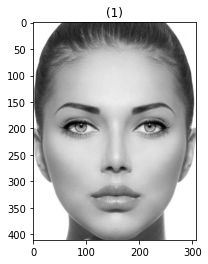

In [410]:

print(grid.predict(HOG_descriptor(positive_patches[0]).reshape(1,-1)))
show_images([rgb2gray(io.imread('test_images\woman2.jpg'))])

In [1]:
import joblib
filename = 'finalized_model.sav'
loaded_model = joblib.load(filename)

In [11]:
x=loaded_model.predict(HOG_descriptor(rgb2gray(io.imread('test_images\woman2.jpg'))))

(8, 6, 8, 8)
(8, 6, 8, 8)
heeeh (8, 6, 8, 8)
timewewwww 0.011143599999996923
timewewwww 0.0015713999999888983


ValueError: Expected 2D array, got 1D array instead:
array=[8.4910423e-02 2.5310582e-01 6.1018658e-01 ... 8.8964009e-09 2.7467831e-08
 2.3191397e-03].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [53]:
def search_for_face(img,division_factor1,division_factor2,step):
    x,y=img.shape
    l,w=(int(img.shape[0]/division_factor1),int(img.shape[1]/division_factor2))
    for row in range(0,x-l,step):
        for col in range(0,y-w,step):
            #print(l,w)
            partition=img[row:row+l,col:col+w]
            show_images([partition])
            prediction=loaded_model.predict(HOG_descriptor(img).reshape(1, -1),)
            if prediction!=0:
                print(prediction)
            

In [ ]:
#io.imread('test_images\woman.jpg').shape
search_for_face(cv2.resize(rgb2gray(io.imread('test_images\woman.jpg')), (150,150), interpolation = cv2.INTER_AREA),1,2,1)